In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import unittest

In [2]:
logging.basicConfig(
    filename='analysis.log',
    filemode='w',
    level=logging.DEBUG,
    format='%(asctime)s-%(name)s-%(levelname)s-%(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [3]:
social=pd.read_csv(r'Time-Wasters on Social Media.csv')
data=pd.DataFrame(social)
logging.info('retrieving the data')


In [4]:
data.head()

UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0       1   56    Male       Pakistan   82812   True           True   
1       2   46  Female         Mexico   27999  False           True   
2       3   32  Female  United States   42436  False           True   
3       4   60    Male         Barzil   62963   True          False   
4       5   25    Male       Pakistan   22096  False           True   

      Profession Demographics   Platform  ...  ProductivityLoss  Satisfaction  \
0       Engineer        Rural  Instagram  ...                 3             7   
1         Artist        Urban  Instagram  ...                 5             5   
2       Engineer        Rural   Facebook  ...                 6             4   
3  Waiting staff        Rural    YouTube  ...                 3             7   
4        Manager        Urban     TikTok  ...                 8             2   

      Watch Reason  DeviceType       OS  Watch Time  Self Control  \
0  Procrastination  Smartphone  Android     9:00 PM             5   
1            Habit    Computer  Android     5:00 PM             7   
2    Entertainment      Tablet  Android     2:00 PM             8   
3            Habit  Smartphone  Android     9:00 PM             5   
4          Boredom  Smartphone      iOS     8:00 AM            10   

   Addiction Level  CurrentActivity  ConnectionType  
0                5        Commuting     Mobile Data  
1                3        At school           Wi-Fi  
2                2          At home     Mobile Data  
3                5        Commuting     Mobile Data  
4                0          At home     Mobile Data  

[5 rows x 31 columns]

In [5]:
data.dtypes
logging.info('collecting the data-types of the attributes of the dataframe')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

In [7]:
print(f'{data.isnull().sum()*100}/{len(data)}')
logging.info('checking the null values of the attributes of the dataframe')

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64/1000


In [8]:
data.describe(include='all')

UserID          Age Gender Location        Income  Debt  \
count   1000.000000  1000.000000   1000     1000   1000.000000  1000   
unique          NaN          NaN      3       10           NaN     2   
top             NaN          NaN   Male    India           NaN  True   
freq            NaN          NaN    514      228           NaN   599   
mean     500.500000    40.986000    NaN      NaN  59524.213000   NaN   
std      288.819436    13.497852    NaN      NaN  23736.212925   NaN   
min        1.000000    18.000000    NaN      NaN  20138.000000   NaN   
25%      250.750000    29.000000    NaN      NaN  38675.250000   NaN   
50%      500.500000    42.000000    NaN      NaN  58805.000000   NaN   
75%      750.250000    52.000000    NaN      NaN  79792.250000   NaN   
max     1000.000000    64.000000    NaN      NaN  99676.000000   NaN   

       Owns Property Profession Demographics Platform  ...  ProductivityLoss  \
count           1000       1000         1000     1000  ...       1000.000000   
unique             2          9            2        4  ...               NaN   
top             True   Students        Rural   TikTok  ...               NaN   
freq             542        246          746      273  ...               NaN   
mean             NaN        NaN          NaN      NaN  ...          5.136000   
std              NaN        NaN          NaN      NaN  ...          2.122265   
min              NaN        NaN          NaN      NaN  ...          1.000000   
25%              NaN        NaN          NaN      NaN  ...          3.000000   
50%              NaN        NaN          NaN      NaN  ...          5.000000   
75%              NaN        NaN          NaN      NaN  ...          6.000000   
max              NaN        NaN          NaN      NaN  ...          9.000000   

        Satisfaction  Watch Reason  DeviceType       OS  Watch Time  \
count    1000.000000          1000        1000     1000        1000   
unique           NaN             4           3        4          16   
top              NaN         Habit  Smartphone  Android     2:00 PM   
freq             NaN           339         585      500         149   
mean        4.864000           NaN         NaN      NaN         NaN   
std         2.122265           NaN         NaN      NaN         NaN   
min         1.000000           NaN         NaN      NaN         NaN   
25%         4.000000           NaN         NaN      NaN         NaN   
50%         5.000000           NaN         NaN      NaN         NaN   
75%         7.000000           NaN         NaN      NaN         NaN   
max         9.000000           NaN         NaN      NaN         NaN   

        Self Control  Addiction Level  CurrentActivity  ConnectionType  
count    1000.000000      1000.000000             1000            1000  
unique           NaN              NaN                4               2  
top              NaN              NaN          At home     Mobile Data  
freq             NaN              NaN              381             686  
mean        7.094000         2.906000              NaN             NaN  
std         2.058495         2.058495              NaN             NaN  
min         3.000000         0.000000              NaN             NaN  
25%         5.000000         2.000000              NaN             NaN  
50%         7.000000         3.000000              NaN             NaN  
75%         8.000000         5.000000              NaN             NaN  
max        10.000000         7.000000              NaN             NaN  

[11 rows x 31 columns]

In [9]:
for i in data.columns[1::1]:
    if data[i].dtype=='object':
        print(f'unique values of {i}:\n')
        print(f'{data[i].value_counts()}')
        print('\n')
logging.debug('unique values of the object data-types of the columns of the data.')

unique values of Gender:

Gender
Male      514
Female    322
Other     164
Name: count, dtype: int64


unique values of Location:

Location
India            228
United States    174
Vietnam           82
Barzil            78
Philippines       78
Indonesia         77
Pakistan          76
Japan             75
Mexico            73
Germany           59
Name: count, dtype: int64


unique values of Profession:

Profession
Students         246
Waiting staff    194
Labor/Worker     186
driver           113
Engineer          65
Cashier           56
Manager           54
Artist            47
Teacher           39
Name: count, dtype: int64


unique values of Demographics:

Demographics
Rural    746
Urban    254
Name: count, dtype: int64


unique values of Platform:

Platform
TikTok       273
Instagram    256
YouTube      250
Facebook     221
Name: count, dtype: int64


unique values of Video Category:

Video Category
Jokes/Memes      179
Life Hacks       162
Gaming           119
Vlogs            114

In [10]:
modified_data=data.copy()

In [11]:
modified_data.head()

UserID  Age  Gender       Location  Income   Debt  Owns Property  \
0       1   56    Male       Pakistan   82812   True           True   
1       2   46  Female         Mexico   27999  False           True   
2       3   32  Female  United States   42436  False           True   
3       4   60    Male         Barzil   62963   True          False   
4       5   25    Male       Pakistan   22096  False           True   

      Profession Demographics   Platform  ...  ProductivityLoss  Satisfaction  \
0       Engineer        Rural  Instagram  ...                 3             7   
1         Artist        Urban  Instagram  ...                 5             5   
2       Engineer        Rural   Facebook  ...                 6             4   
3  Waiting staff        Rural    YouTube  ...                 3             7   
4        Manager        Urban     TikTok  ...                 8             2   

      Watch Reason  DeviceType       OS  Watch Time  Self Control  \
0  Procrastination  Smartphone  Android     9:00 PM             5   
1            Habit    Computer  Android     5:00 PM             7   
2    Entertainment      Tablet  Android     2:00 PM             8   
3            Habit  Smartphone  Android     9:00 PM             5   
4          Boredom  Smartphone      iOS     8:00 AM            10   

   Addiction Level  CurrentActivity  ConnectionType  
0                5        Commuting     Mobile Data  
1                3        At school           Wi-Fi  
2                2          At home     Mobile Data  
3                5        Commuting     Mobile Data  
4                0          At home     Mobile Data  

[5 rows x 31 columns]

In [12]:
modified_data.drop(columns=['UserID','Video ID'],axis=1)

Age  Gender       Location  Income   Debt  Owns Property     Profession  \
0     56    Male       Pakistan   82812   True           True       Engineer   
1     46  Female         Mexico   27999  False           True         Artist   
2     32  Female  United States   42436  False           True       Engineer   
3     60    Male         Barzil   62963   True          False  Waiting staff   
4     25    Male       Pakistan   22096  False           True        Manager   
..   ...     ...            ...     ...    ...            ...            ...   
995   22    Male          India   74254   True           True       Students   
996   40  Female       Pakistan   27006  False          False  Waiting staff   
997   27    Male          India   94218   True           True  Waiting staff   
998   61    Male       Pakistan   85344   True          False       Students   
999   19    Male          India   53840   True           True         driver   

    Demographics   Platform  Total Time Spent  ...  ProductivityLoss  \
0          Rural  Instagram                80  ...                 3   
1          Urban  Instagram               228  ...                 5   
2          Rural   Facebook                30  ...                 6   
3          Rural    YouTube               101  ...                 3   
4          Urban     TikTok               136  ...                 8   
..           ...        ...               ...  ...               ...   
995        Rural     TikTok               144  ...                 9   
996        Urban   Facebook               231  ...                 8   
997        Rural     TikTok               165  ...                 9   
998        Urban    YouTube               151  ...                 3   
999        Urban    YouTube               167  ...                 6   

    Satisfaction     Watch Reason  DeviceType       OS  Watch Time  \
0              7  Procrastination  Smartphone  Android     9:00 PM   
1              5            Habit    Computer  Android     5:00 PM   
2              4    Entertainment      Tablet  Android     2:00 PM   
3              7            Habit  Smartphone  Android     9:00 PM   
4              2          Boredom  Smartphone      iOS     8:00 AM   
..           ...              ...         ...      ...         ...   
995            1  Procrastination  Smartphone      iOS     5:45 PM   
996            2          Boredom  Smartphone    MacOS    10:15 PM   
997            1  Procrastination  Smartphone      iOS    10:15 PM   
998            7  Procrastination  Smartphone    MacOS    10:15 PM   
999            4  Procrastination  Smartphone  Android     4:25 PM   

     Self Control  Addiction Level CurrentActivity  ConnectionType  
0               5                5       Commuting     Mobile Data  
1               7                3       At school           Wi-Fi  
2               8                2         At home     Mobile Data  
3               5                5       Commuting     Mobile Data  
4              10                0         At home     Mobile Data  
..            ...              ...             ...             ...  
995            10                0         At work     Mobile Data  
996            10                0         At home     Mobile Data  
997            10                0       Commuting     Mobile Data  
998             5                5         At work           Wi-Fi  
999             8                2         At home     Mobile Data  

[1000 rows x 29 columns]

In [13]:
class label_info():
    def __init__(self):
        pass
        
    def analyse_the_plot(self,df,time_spent,category,engagement,no_of_videos_watched,scroll_rate):
        self.df=df
        self.time_spent=time_spent
        self.category=category
        self.engaement=engagement
        self.no_of_videos_watched=no_of_videos_watched
        self.scroll_rate=scroll_rate
        print(f'{self.category}:')
        
        plt.figure(figsize=(8,10))
        
        logging.debug('Details about the distribution of the category')
        print(f'Distribution of people of {self.category}')
        print((self.df[self.category].value_counts()*100)/len(self.df))
        plt.pie(self.df[self.category].value_counts(),shadow=True,autopct='%1.2f%%')
        plt.title(f'Distribution of people of {self.category}')
        plt.show()
        
    
        logging.debug('Details about the distribution of time spent of the category')
        sns.histplot(self.df[self.time_spent],bins=10,kde=True)
        plt.title(f'Distribution of time spent for {self.category}')
        plt.legend(self.df[self.category])
        plt.grid(True)
        plt.show()
        
        print(f'Total time spent by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.time_spent].sum())
        sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')
        plt.title(f'Distribution of total time spent of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        print(f'Average time spent by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.time_spent].mean())
        sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')
        plt.title(f'Distribution of total time spent of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        logging.debug('Details about the distribution of the number of videos watched of the category')
        sns.histplot(self.df[self.no_of_videos_watched],bins=10,kde=True)
        plt.title(f'Distribution of number of videos watched for {self.category}')
        #plt.legend(self.df[self.category])
        plt.grid(True)
        plt.show()
        
        print(f'Total number of videos watched by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.no_of_videos_watched].sum())
        sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')
        plt.title(f'Distribution of total number of videos watched of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        print(f'Average number of videos watched by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.no_of_videos_watched].mean())
        sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')
        plt.title(f'Distribution of average number of videos watched of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        logging.debug('Details about the distribution of the scrolling rate of the category')
        sns.histplot(self.df[self.scroll_rate],bins=10,kde=True)
        plt.title(f'Distribution of scrolling rate for {self.category}')
        #plt.legend(self.df[self.category])
        plt.grid(True)
        plt.show()
        
        print(f'Total scrolling data by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.scroll_rate].sum())
        sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')
        plt.title(f'Distribution of total scrolling rate of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        print(f'Average scrolling rate by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.scroll_rate].mean())
        sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')
        plt.title(f'Distribution of average scrolling rate of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        logging.debug('Details about the distribution of the number of the engagements of the category')
        sns.histplot(self.df[self.engaement],bins=10,kde=True)
        plt.title(f'Distribution of engagements for {self.category}')
        #plt.legend(self.df[self.category])
        plt.grid(True)
        plt.show()
        
        print(f'Total number of the engagements by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.engaement].sum())
        sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')
        plt.title(f'Distribution of total number of the engagements of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()
        
        print(f'Average number of the engagements by different groups of {self.category}')
        print(self.df.groupby(self.category)[self.engaement].mean())
        sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')
        plt.title(f'Distribution of average number of the engagements of {self.category}')
        plt.xticks(rotation='vertical')
        #plt.legend(self.df[self.category])
        plt.show()

In [14]:
label=label_info()

In [15]:
#list of all object data type of the modified dataframe
obj_col=modified_data.select_dtypes(include=['object']).columns.to_list()
obj_col

['Gender',
 'Location',
 'Profession',
 'Demographics',
 'Platform',
 'Video Category',
 'Frequency',
 'Watch Reason',
 'DeviceType',
 'OS',
 'Watch Time',
 'CurrentActivity',
 'ConnectionType']

Gender:
Distribution of people of Gender
Gender
Male      51.4
Female    32.2
Other     16.4
Name: count, dtype: float64


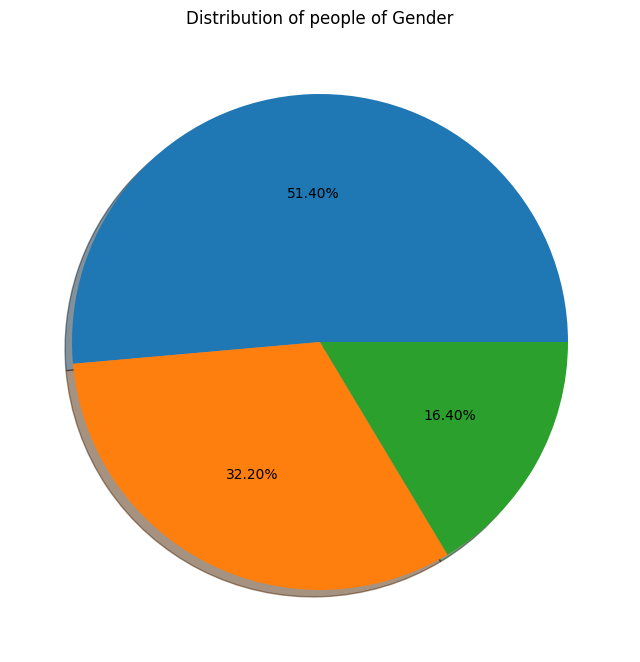

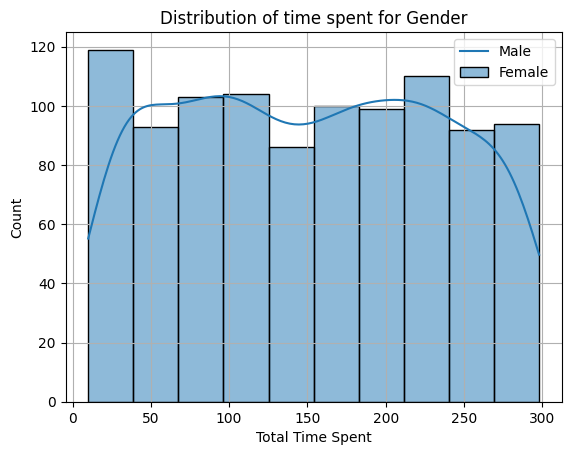

Total time spent by different groups of Gender
Gender
Female    47813
Male      78120
Other     25473
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


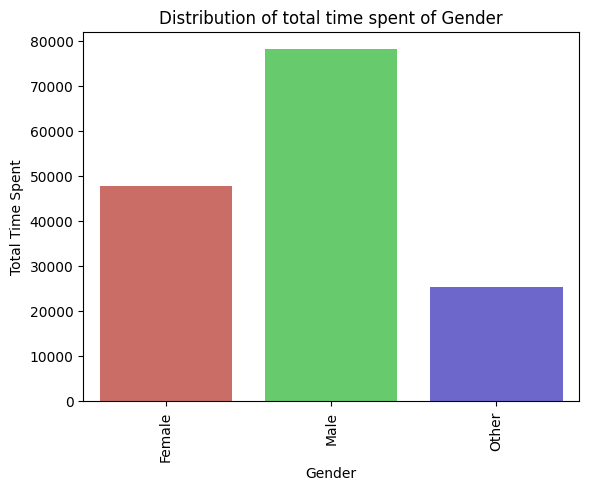

Average time spent by different groups of Gender
Gender
Female    148.487578
Male      151.984436
Other     155.323171
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


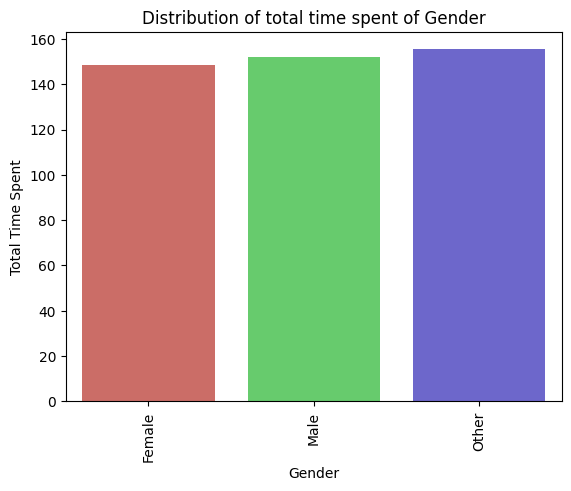

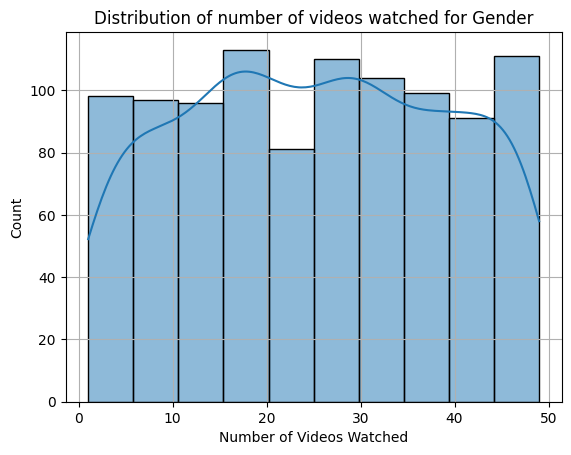

Total number of videos watched by different groups of Gender
Gender
Female     8121
Male      13272
Other      3855
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


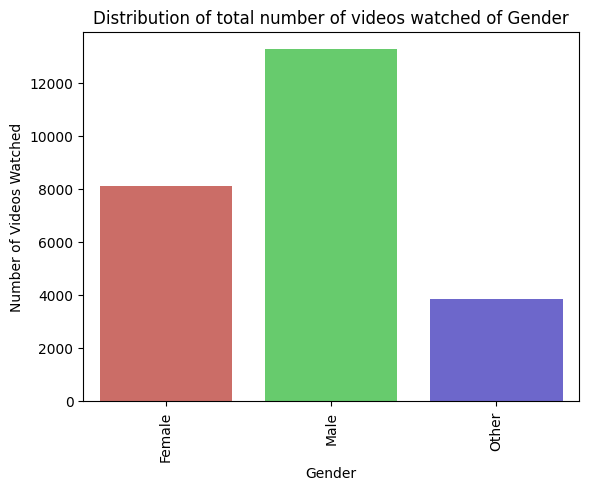

Average number of videos watched by different groups of Gender
Gender
Female    25.220497
Male      25.821012
Other     23.506098
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


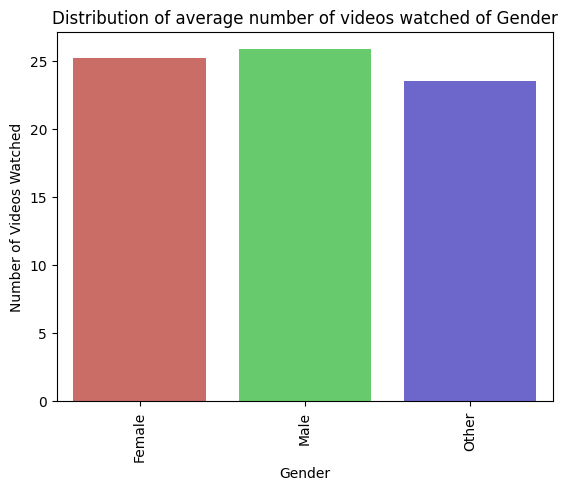

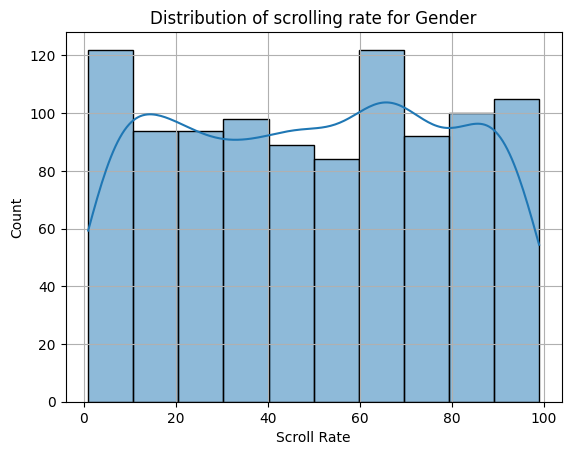

Total scrolling data by different groups of Gender
Gender
Female    16048
Male      25512
Other      8214
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


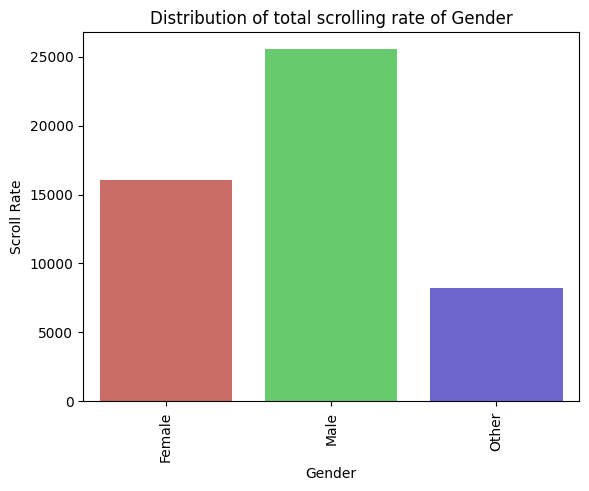

Average scrolling rate by different groups of Gender
Gender
Female    49.838509
Male      49.634241
Other     50.085366
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


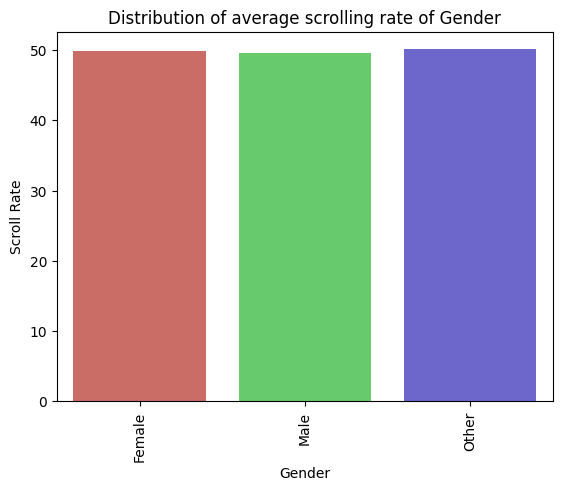

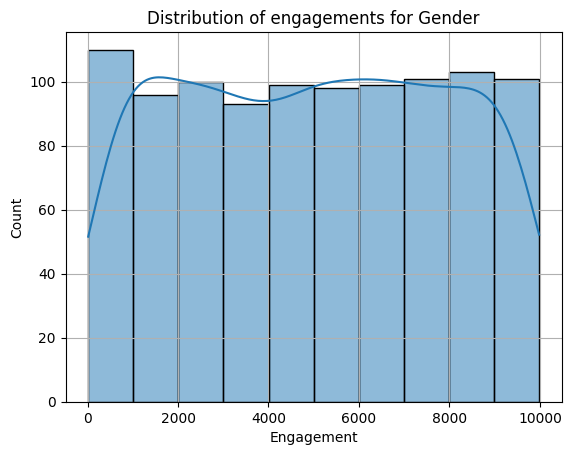

Total number of the engagements by different groups of Gender
Gender
Female    1556835
Male      2599449
Other      840875
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


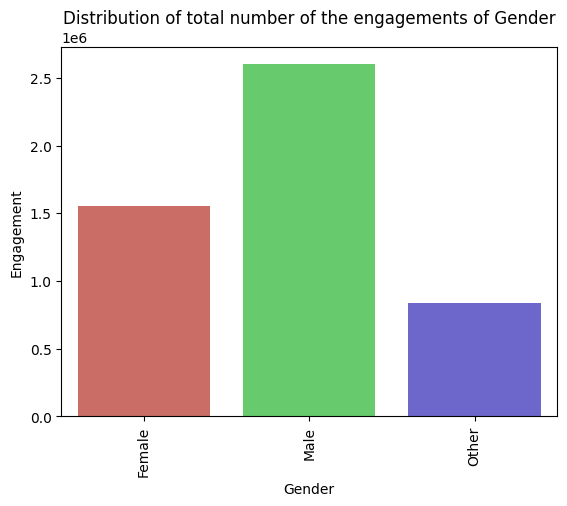

Average number of the engagements by different groups of Gender
Gender
Female    4834.891304
Male      5057.293774
Other     5127.286585
Name: Engagement, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


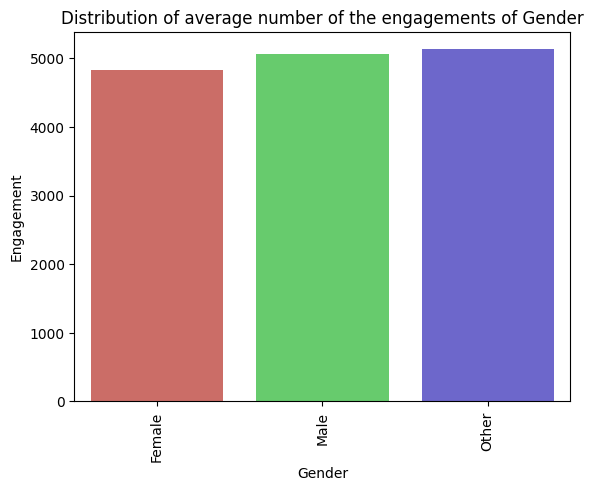

In [16]:
label.analyse_the_plot(modified_data,'Total Time Spent','Gender','Engagement','Number of Videos Watched','Scroll Rate')

Profession:
Distribution of people of Profession
Profession
Students         24.6
Waiting staff    19.4
Labor/Worker     18.6
driver           11.3
Engineer          6.5
Cashier           5.6
Manager           5.4
Artist            4.7
Teacher           3.9
Name: count, dtype: float64


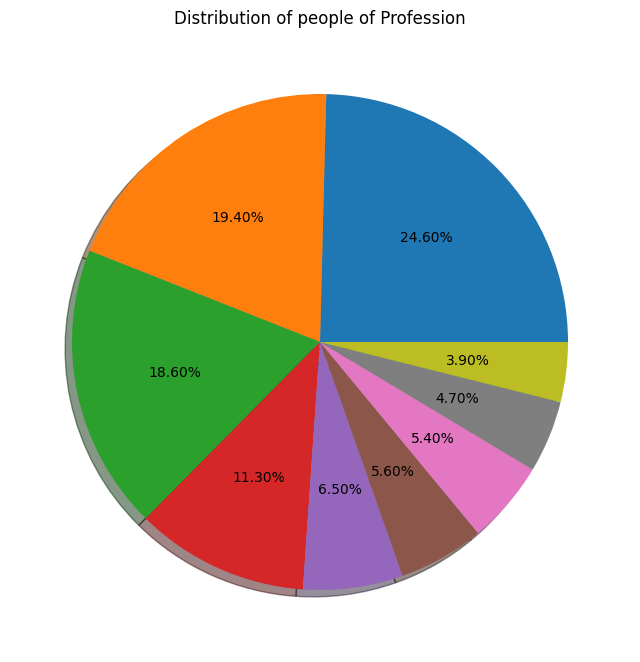

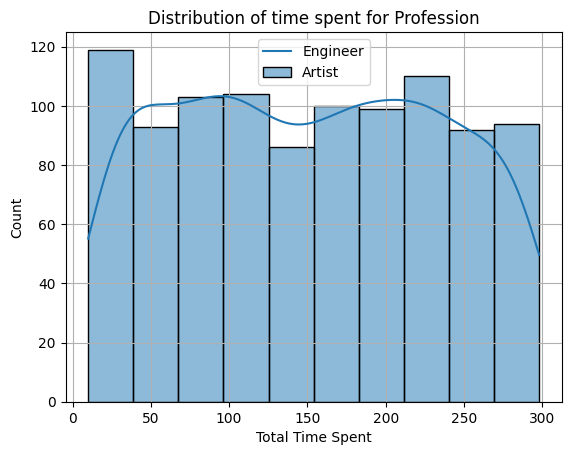

Total time spent by different groups of Profession
Profession
Artist            7190
Cashier           9570
Engineer          9560
Labor/Worker     28924
Manager           8234
Students         36639
Teacher           5812
Waiting staff    28621
driver           16856
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


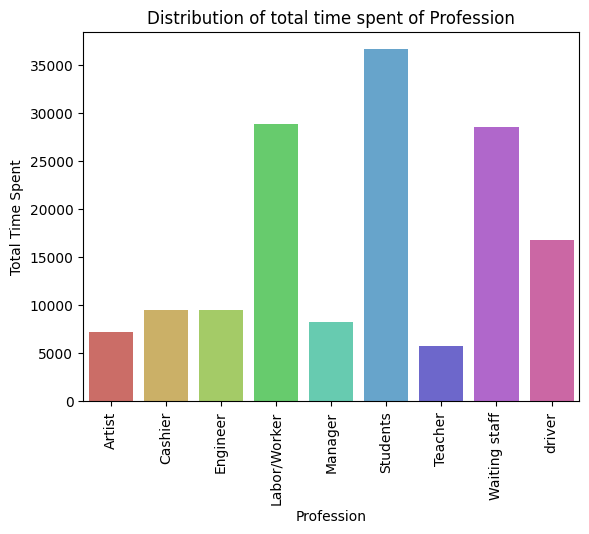

Average time spent by different groups of Profession
Profession
Artist           152.978723
Cashier          170.892857
Engineer         147.076923
Labor/Worker     155.505376
Manager          152.481481
Students         148.939024
Teacher          149.025641
Waiting staff    147.530928
driver           149.168142
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


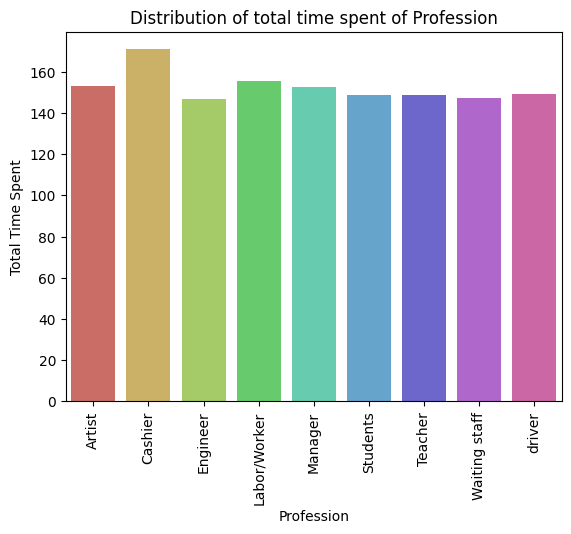

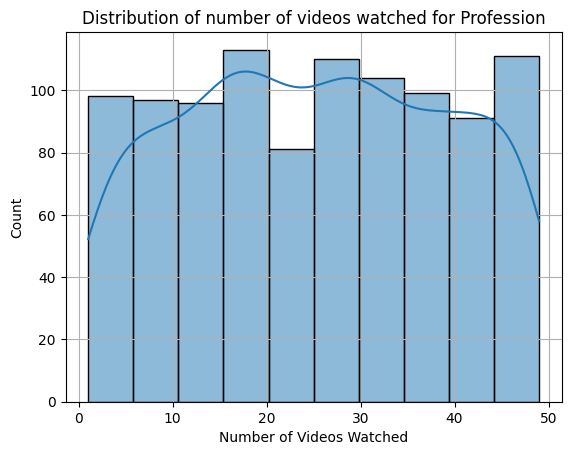

Total number of videos watched by different groups of Profession
Profession
Artist           1318
Cashier          1414
Engineer         1522
Labor/Worker     4786
Manager          1221
Students         6430
Teacher           718
Waiting staff    4900
driver           2939
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


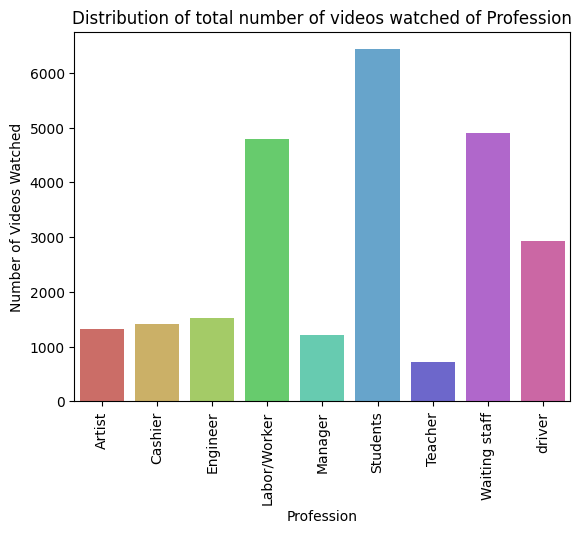

Average number of videos watched by different groups of Profession
Profession
Artist           28.042553
Cashier          25.250000
Engineer         23.415385
Labor/Worker     25.731183
Manager          22.611111
Students         26.138211
Teacher          18.410256
Waiting staff    25.257732
driver           26.008850
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


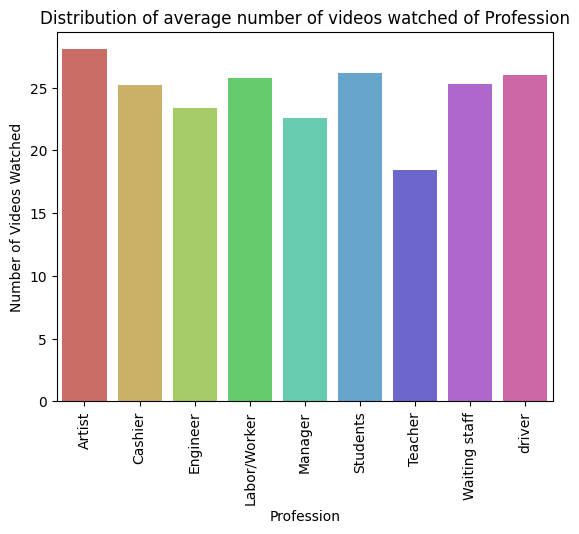

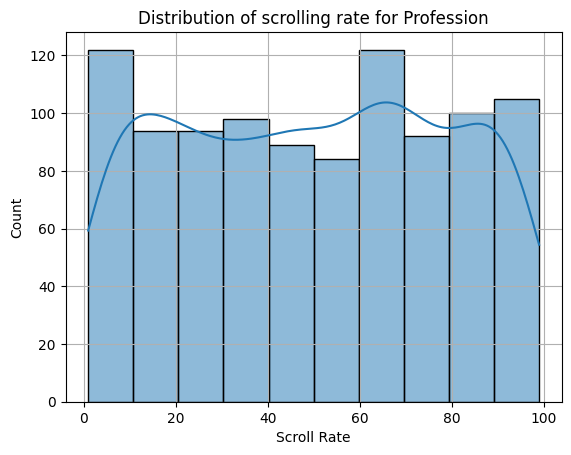

Total scrolling data by different groups of Profession
Profession
Artist            1840
Cashier           2894
Engineer          3262
Labor/Worker      9758
Manager           2498
Students         12652
Teacher           1876
Waiting staff     9657
driver            5337
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


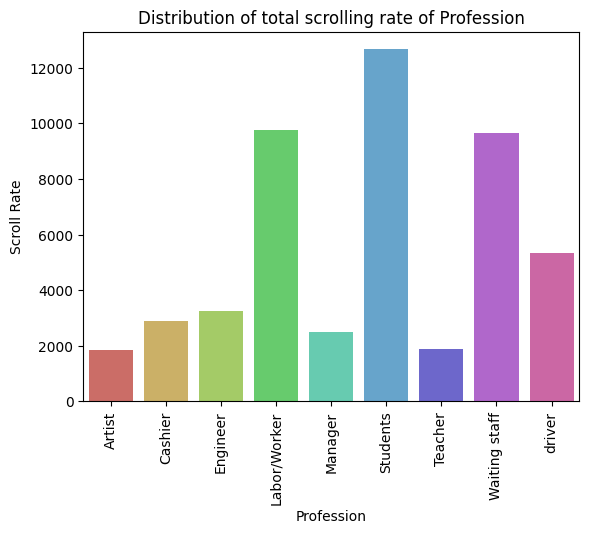

Average scrolling rate by different groups of Profession
Profession
Artist           39.148936
Cashier          51.678571
Engineer         50.184615
Labor/Worker     52.462366
Manager          46.259259
Students         51.430894
Teacher          48.102564
Waiting staff    49.778351
driver           47.230088
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


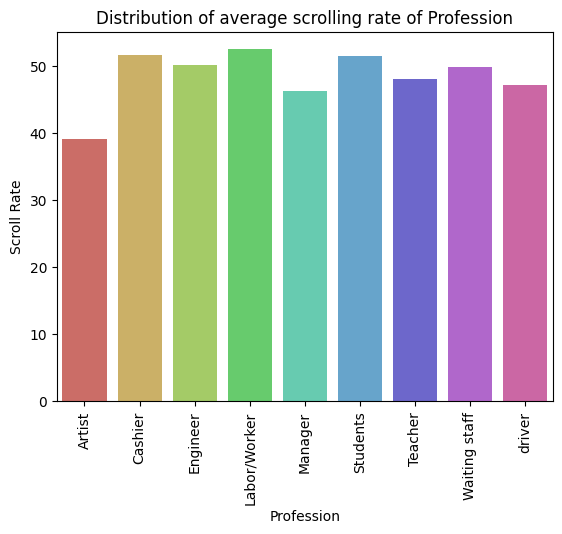

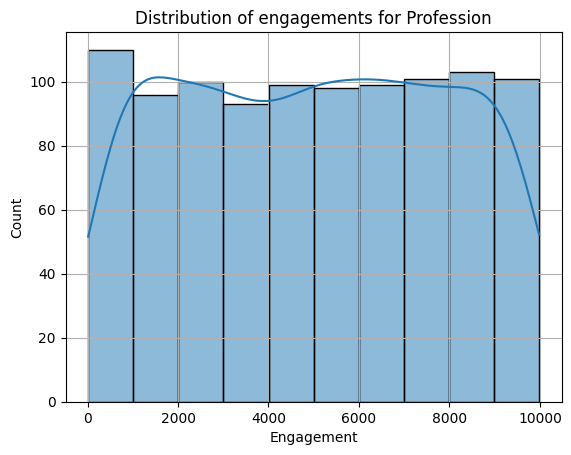

Total number of the engagements by different groups of Profession
Profession
Artist            223521
Cashier           298853
Engineer          293330
Labor/Worker      922268
Manager           295210
Students         1199763
Teacher           195460
Waiting staff    1024483
driver            544271
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


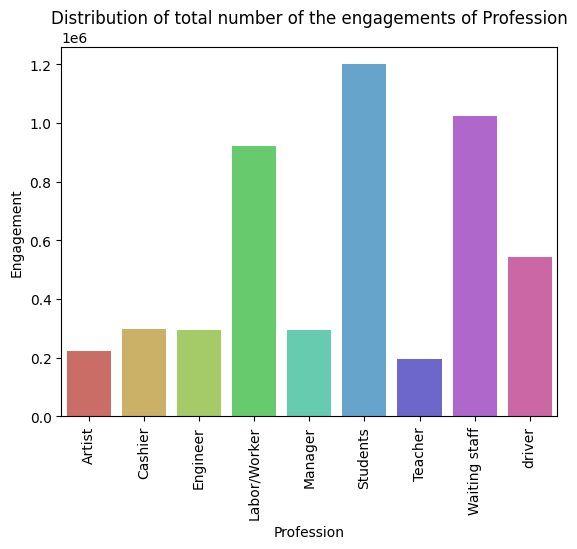

C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


Average number of the engagements by different groups of Profession
Profession
Artist           4755.765957
Cashier          5336.660714
Engineer         4512.769231
Labor/Worker     4958.430108
Manager          5466.851852
Students         4877.085366
Teacher          5011.794872
Waiting staff    5280.840206
driver           4816.557522
Name: Engagement, dtype: float64


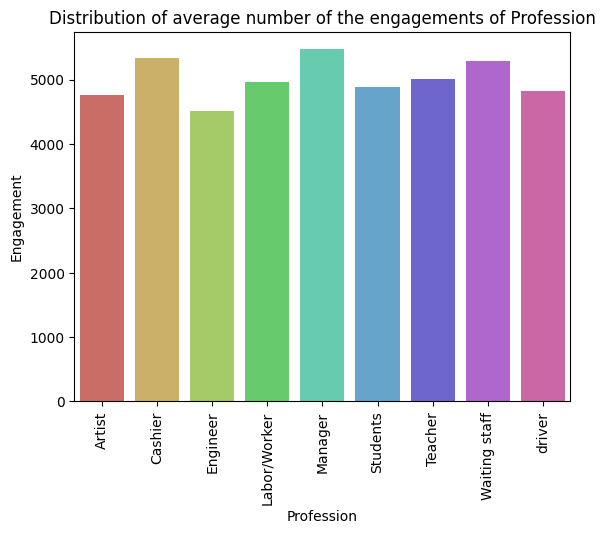

Demographics:
Distribution of people of Demographics
Demographics
Rural    74.6
Urban    25.4
Name: count, dtype: float64


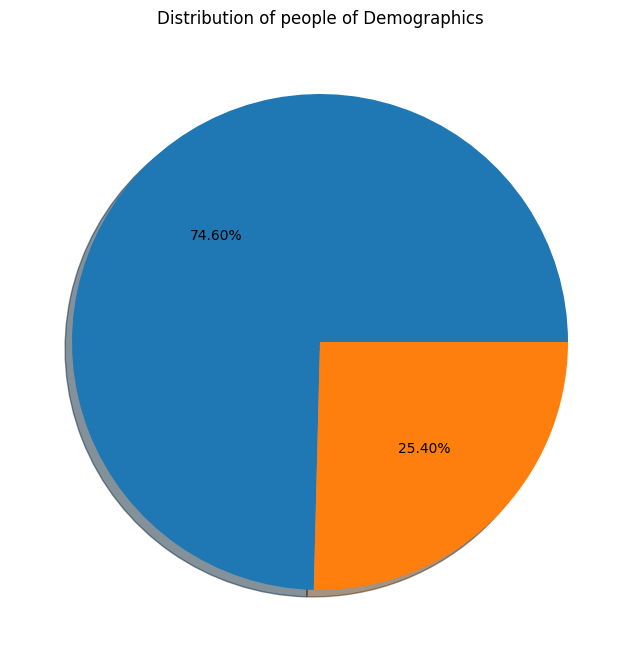

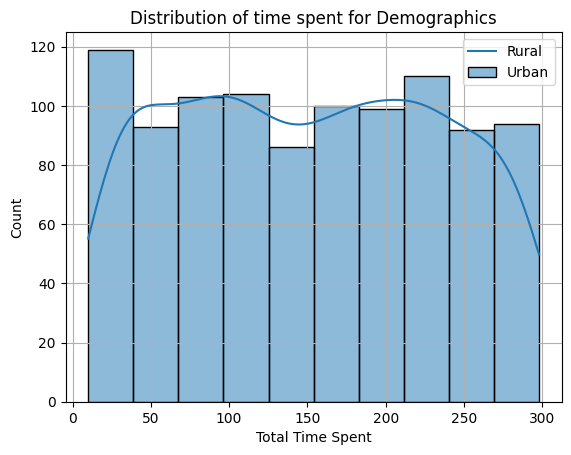

Total time spent by different groups of Demographics
Demographics
Rural    114978
Urban     36428
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


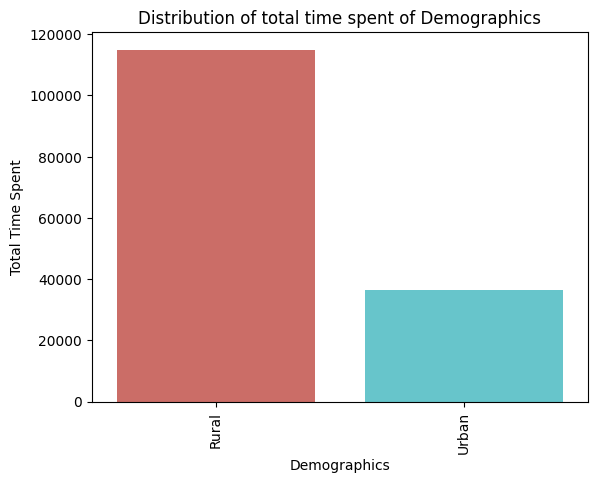

Average time spent by different groups of Demographics
Demographics
Rural    154.126005
Urban    143.417323
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


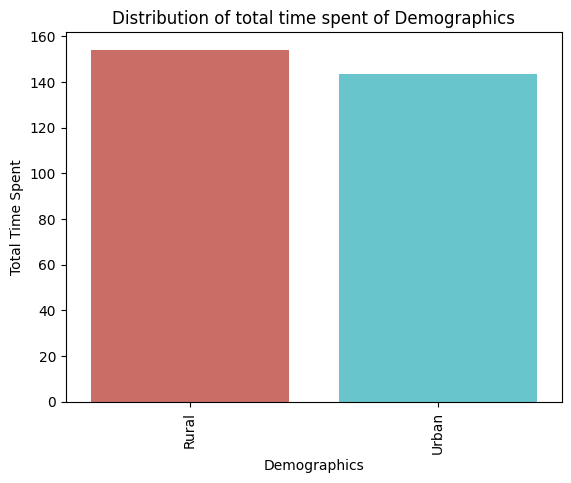

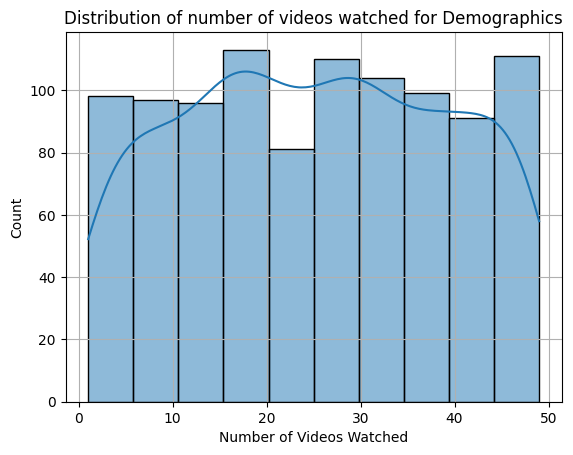

Total number of videos watched by different groups of Demographics
Demographics
Rural    19014
Urban     6234
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


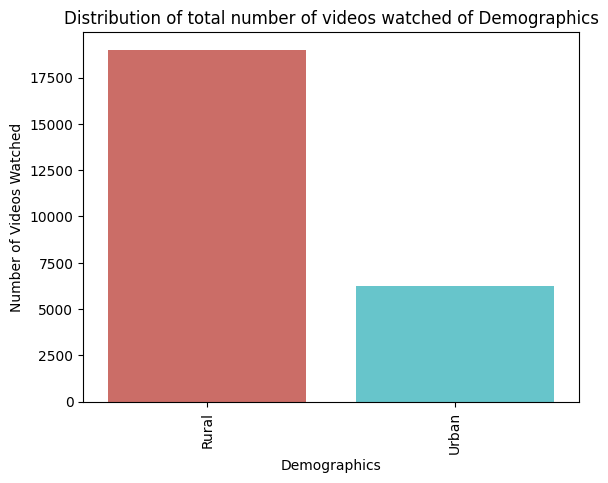

Average number of videos watched by different groups of Demographics
Demographics
Rural    25.487936
Urban    24.543307
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


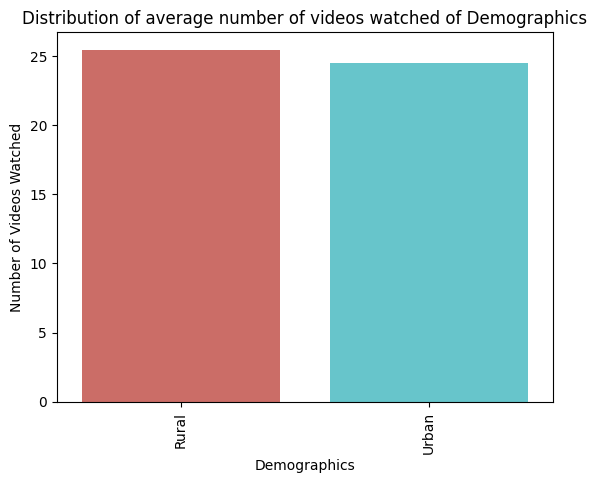

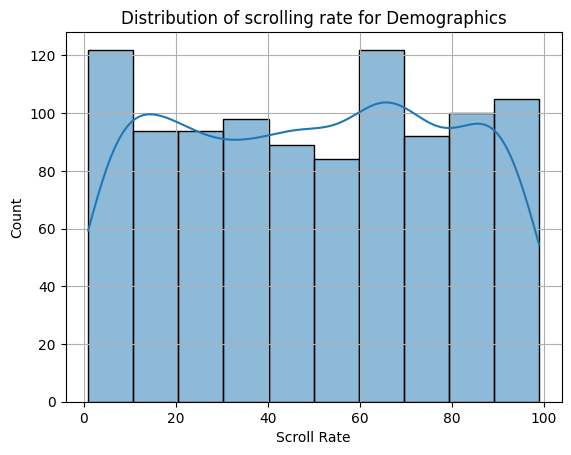

Total scrolling data by different groups of Demographics
Demographics
Rural    37394
Urban    12380
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


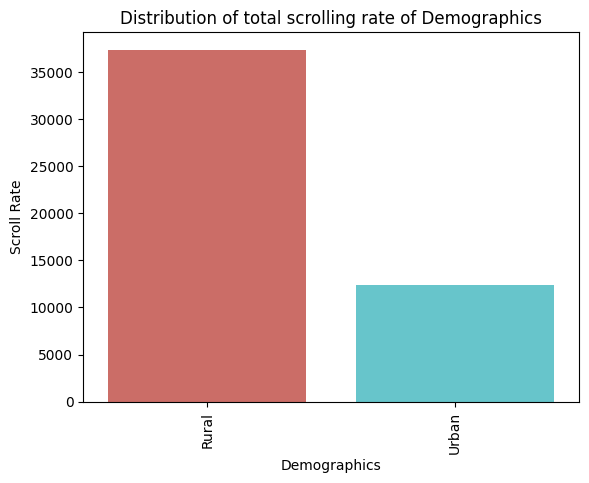

Average scrolling rate by different groups of Demographics
Demographics
Rural    50.126005
Urban    48.740157
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


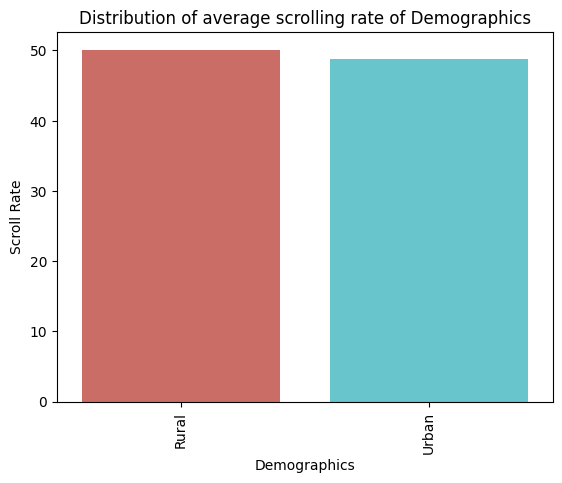

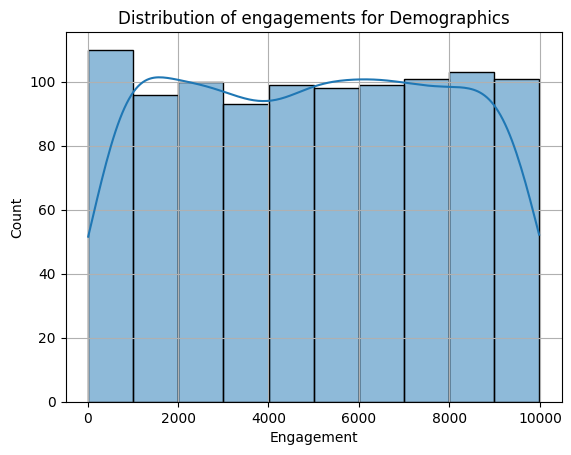

Total number of the engagements by different groups of Demographics
Demographics
Rural    3690971
Urban    1306188
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


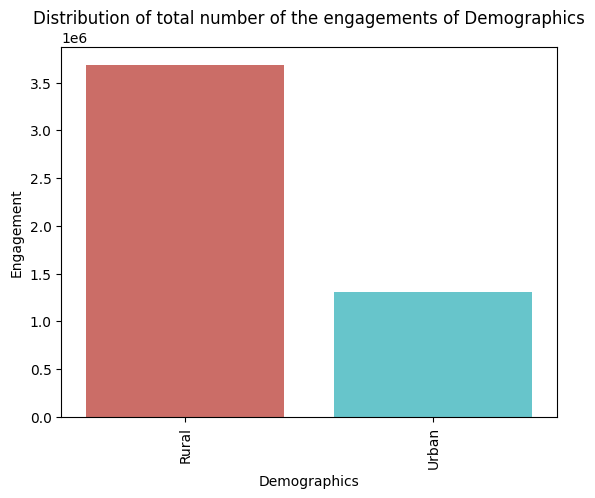

Average number of the engagements by different groups of Demographics
Demographics
Rural    4947.682306
Urban    5142.472441
Name: Engagement, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


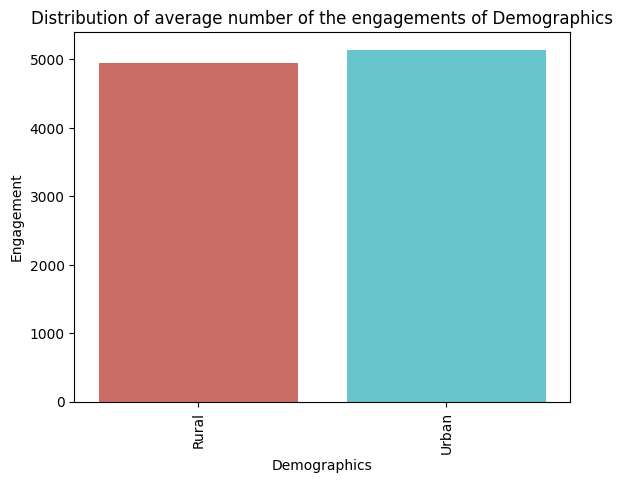

Platform:
Distribution of people of Platform
Platform
TikTok       27.3
Instagram    25.6
YouTube      25.0
Facebook     22.1
Name: count, dtype: float64


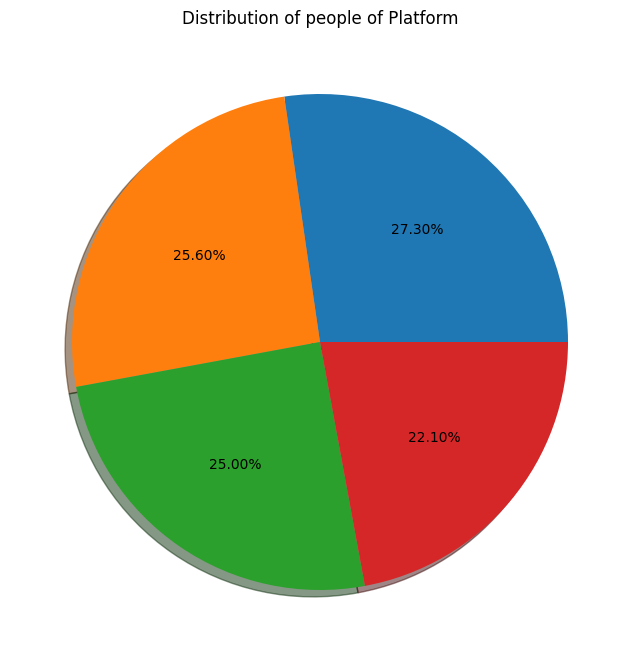

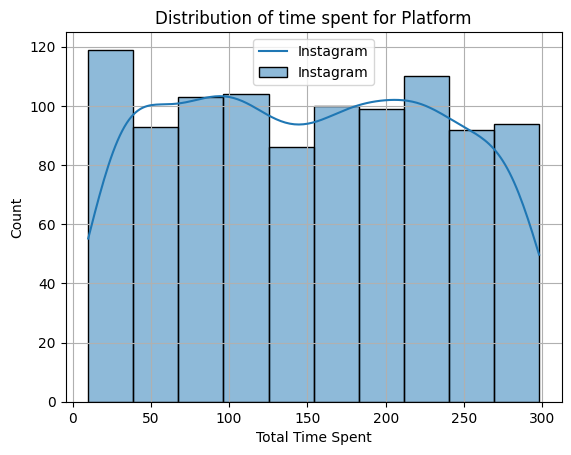

Total time spent by different groups of Platform
Platform
Facebook     34295
Instagram    37609
TikTok       41297
YouTube      38205
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


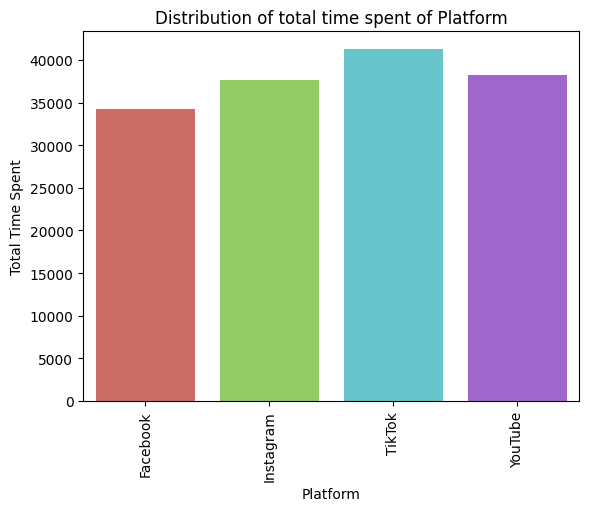

Average time spent by different groups of Platform
Platform
Facebook     155.180995
Instagram    146.910156
TikTok       151.271062
YouTube      152.820000
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


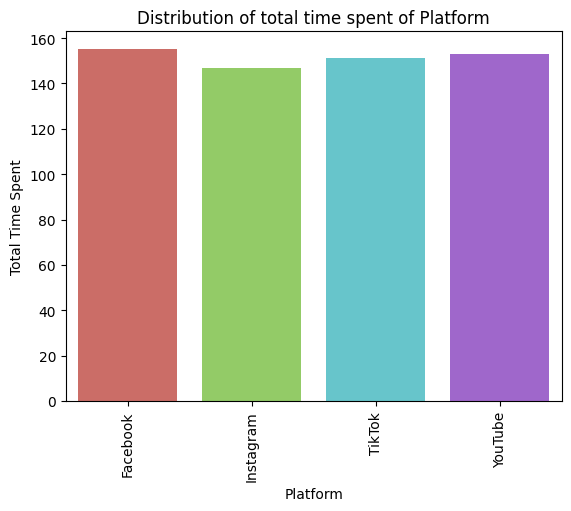

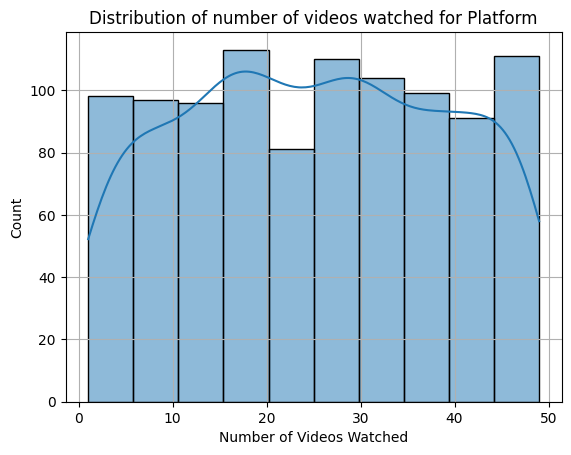

Total number of videos watched by different groups of Platform
Platform
Facebook     5337
Instagram    6778
TikTok       6733
YouTube      6400
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


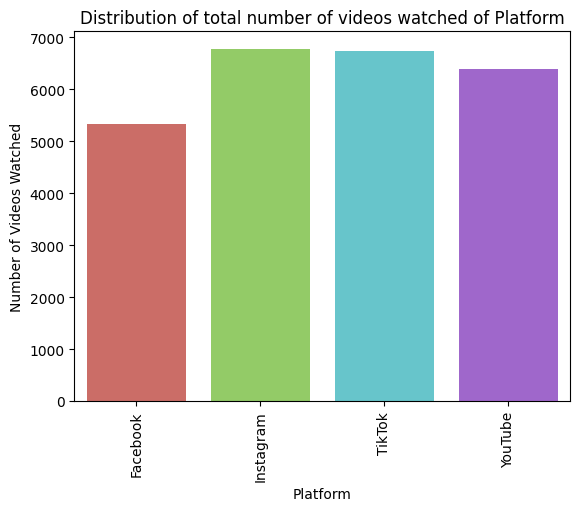

Average number of videos watched by different groups of Platform
Platform
Facebook     24.149321
Instagram    26.476562
TikTok       24.663004
YouTube      25.600000
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


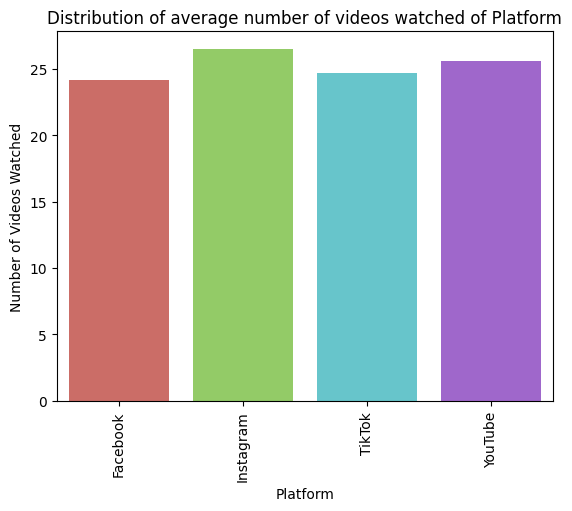

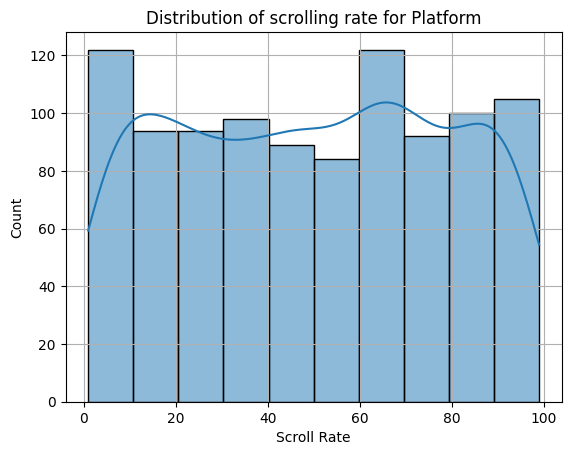

Total scrolling data by different groups of Platform
Platform
Facebook     10336
Instagram    13371
TikTok       13730
YouTube      12337
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


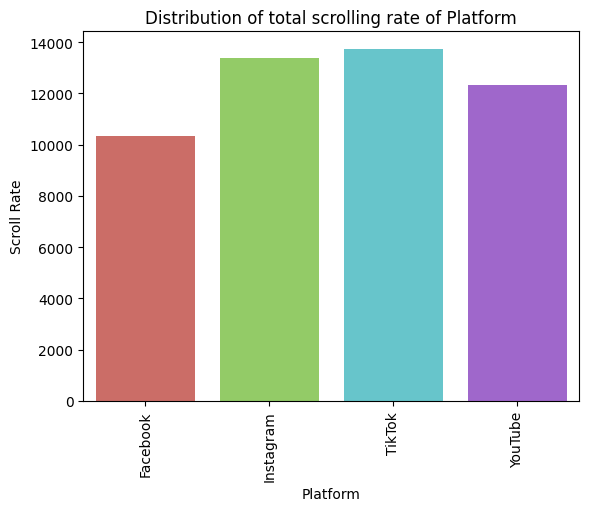

Average scrolling rate by different groups of Platform
Platform
Facebook     46.769231
Instagram    52.230469
TikTok       50.293040
YouTube      49.348000
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


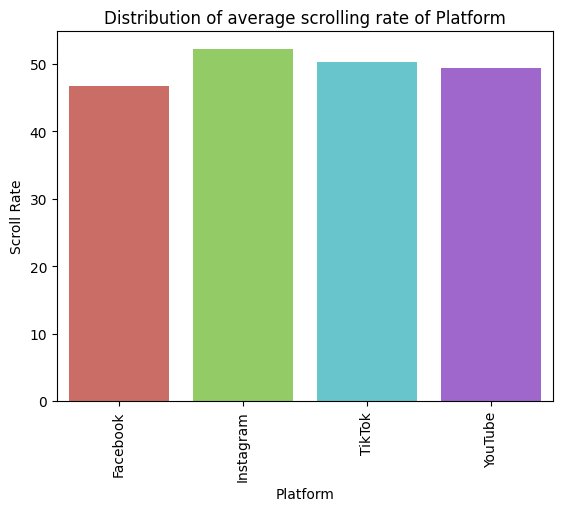

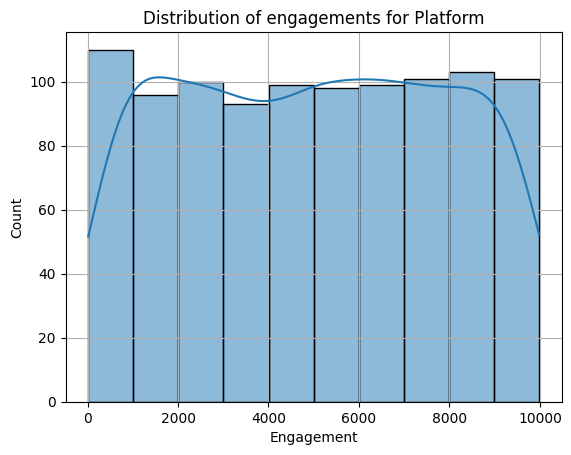

Total number of the engagements by different groups of Platform
Platform
Facebook     1155449
Instagram    1303255
TikTok       1321865
YouTube      1216590
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


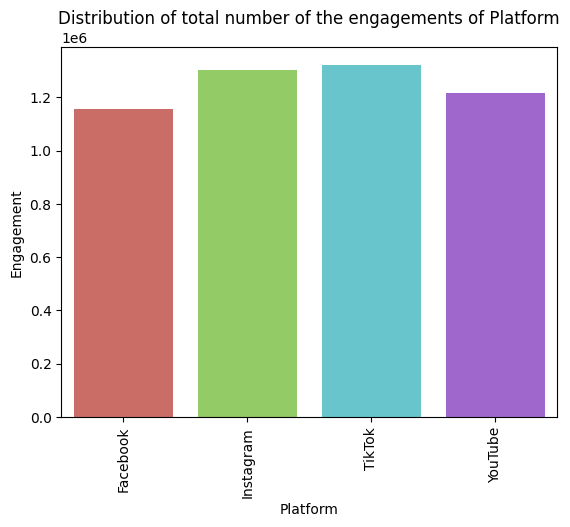

Average number of the engagements by different groups of Platform
Platform
Facebook     5228.276018
Instagram    5090.839844
TikTok       4841.996337
YouTube      4866.360000
Name: Engagement, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


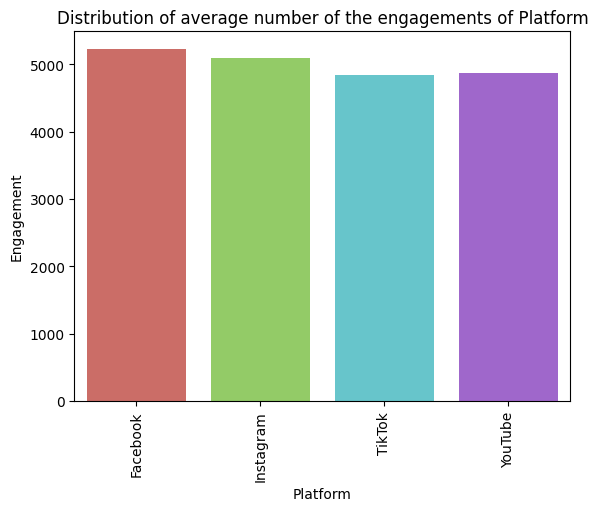

Video Category:
Distribution of people of Video Category
Video Category
Jokes/Memes      17.9
Life Hacks       16.2
Gaming           11.9
Vlogs            11.4
Pranks           11.0
Entertainment    10.2
Trends           10.0
ASMR              7.9
Comedy            3.5
Name: count, dtype: float64


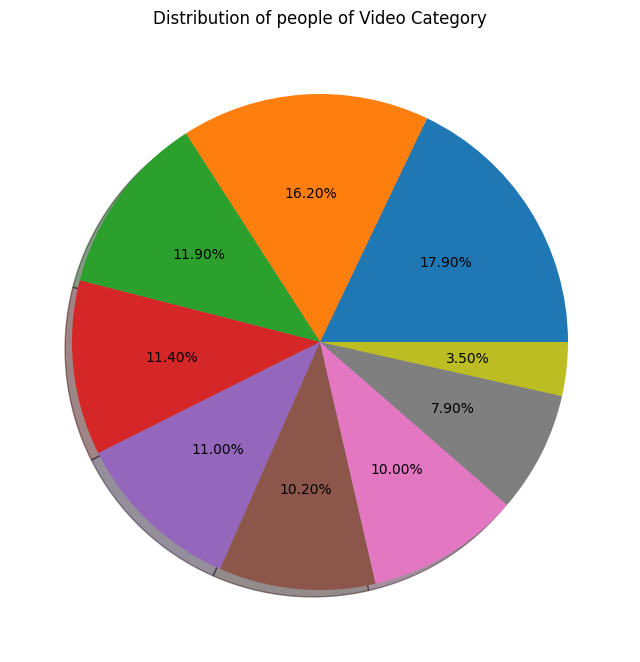

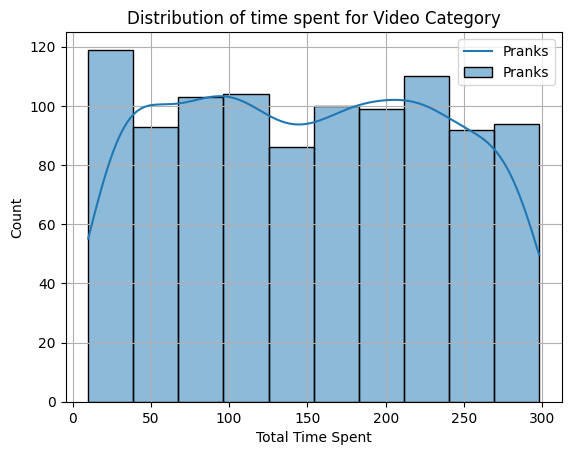

Total time spent by different groups of Video Category
Video Category
ASMR             12307
Comedy            5597
Entertainment    15330
Gaming           18423
Jokes/Memes      27129
Life Hacks       24422
Pranks           16268
Trends           14753
Vlogs            17177
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


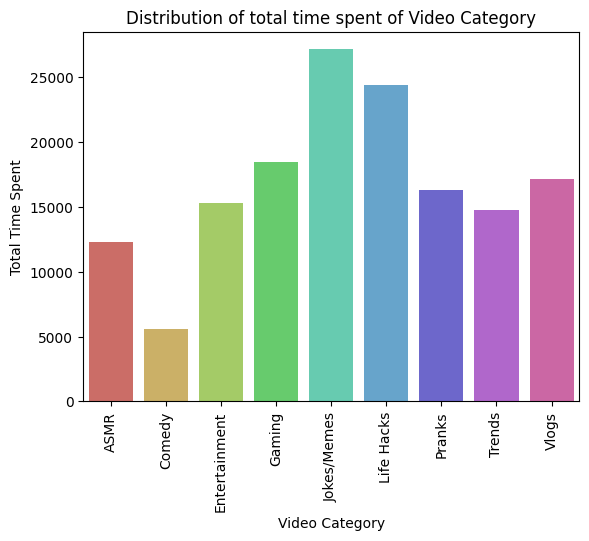

Average time spent by different groups of Video Category
Video Category
ASMR             155.784810
Comedy           159.914286
Entertainment    150.294118
Gaming           154.815126
Jokes/Memes      151.558659
Life Hacks       150.753086
Pranks           147.890909
Trends           147.530000
Vlogs            150.675439
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


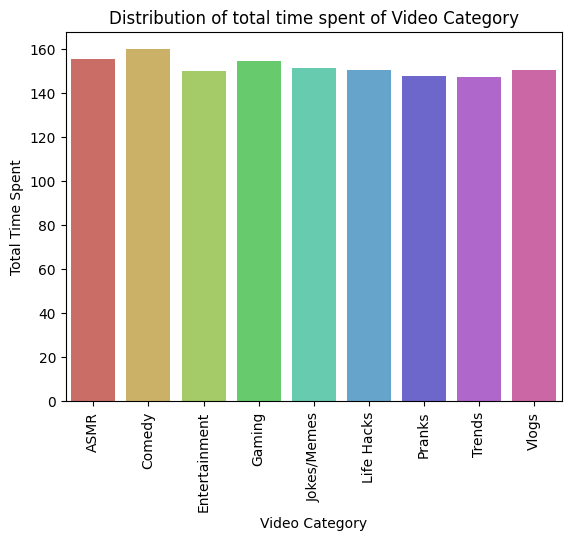

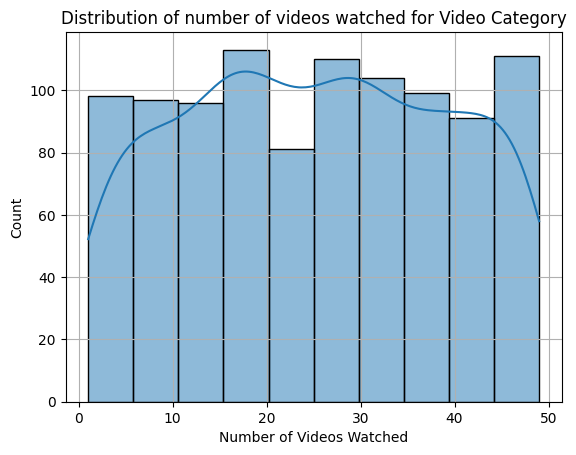

Total number of videos watched by different groups of Video Category
Video Category
ASMR             2038
Comedy            919
Entertainment    2491
Gaming           3069
Jokes/Memes      4552
Life Hacks       4005
Pranks           2682
Trends           2536
Vlogs            2956
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


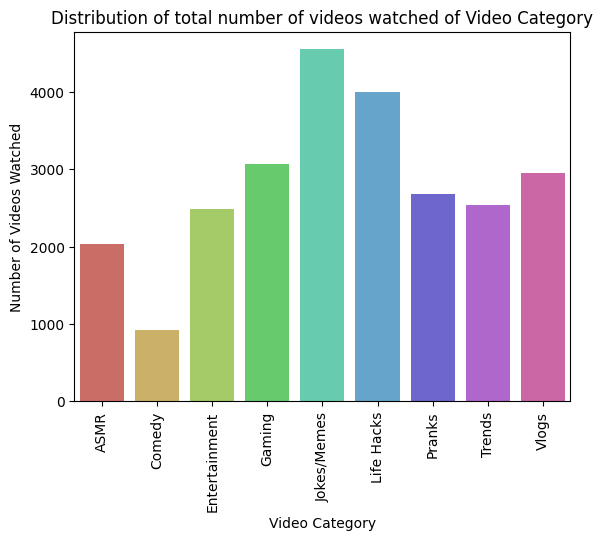

Average number of videos watched by different groups of Video Category
Video Category
ASMR             25.797468
Comedy           26.257143
Entertainment    24.421569
Gaming           25.789916
Jokes/Memes      25.430168
Life Hacks       24.722222
Pranks           24.381818
Trends           25.360000
Vlogs            25.929825
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


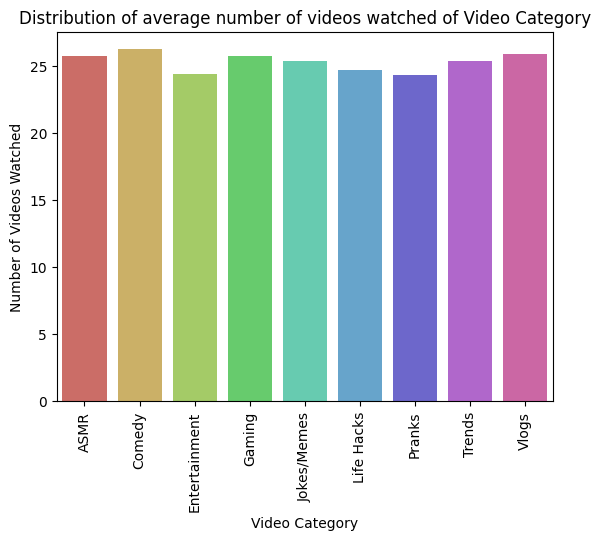

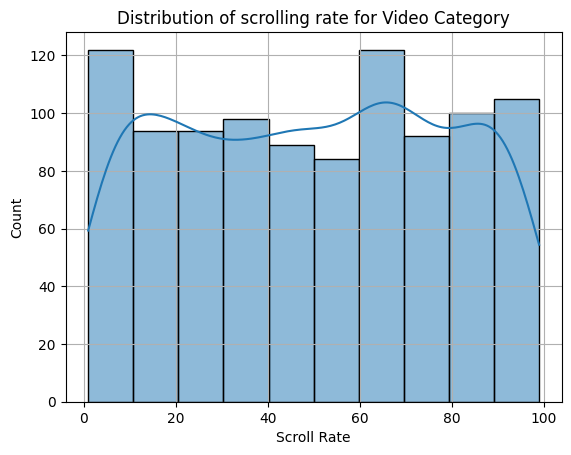

Total scrolling data by different groups of Video Category
Video Category
ASMR             4160
Comedy           1747
Entertainment    4787
Gaming           5798
Jokes/Memes      8997
Life Hacks       7662
Pranks           6065
Trends           5157
Vlogs            5401
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


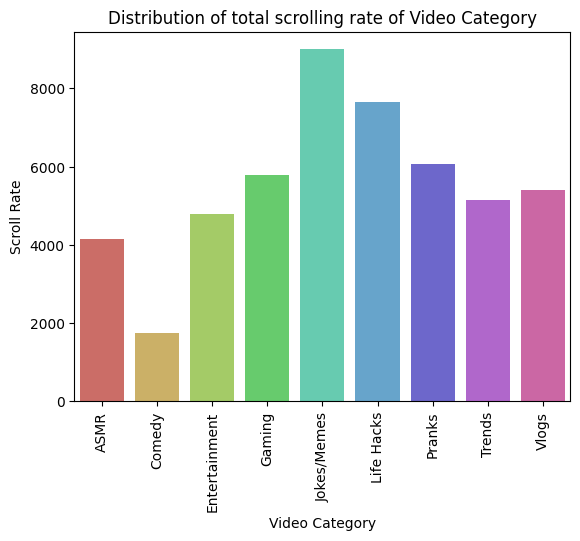

Average scrolling rate by different groups of Video Category
Video Category
ASMR             52.658228
Comedy           49.914286
Entertainment    46.931373
Gaming           48.722689
Jokes/Memes      50.262570
Life Hacks       47.296296
Pranks           55.136364
Trends           51.570000
Vlogs            47.377193
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


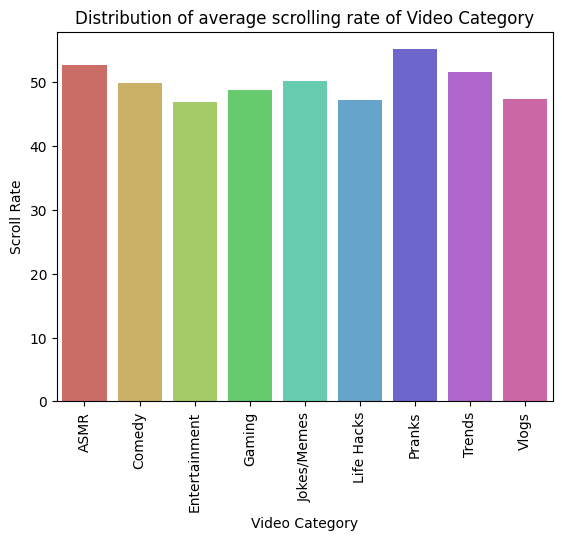

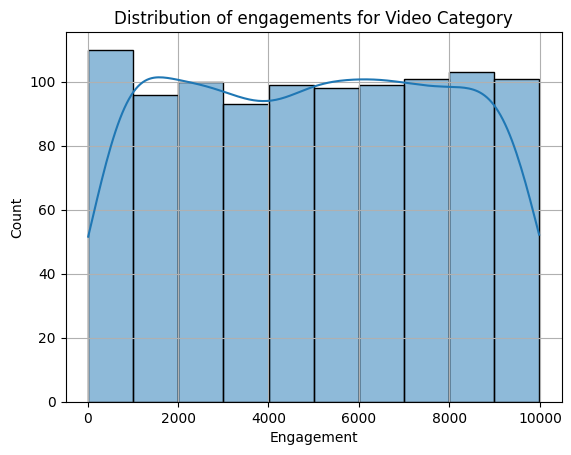

Total number of the engagements by different groups of Video Category
Video Category
ASMR             352004
Comedy           172908
Entertainment    490879
Gaming           535693
Jokes/Memes      887489
Life Hacks       852747
Pranks           565850
Trends           540770
Vlogs            598819
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


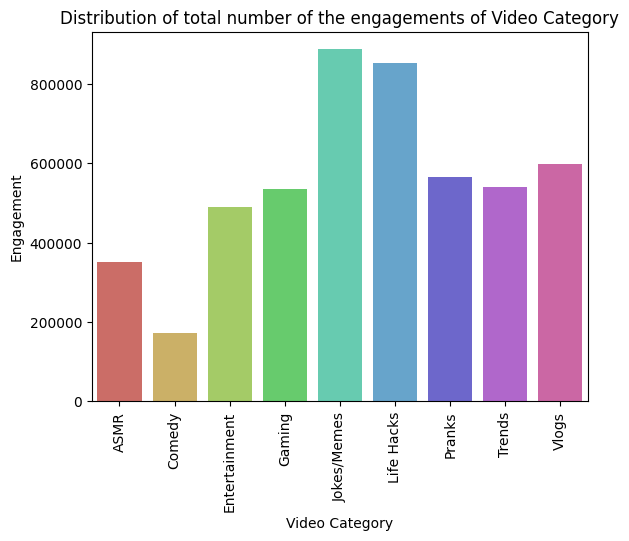

C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


Average number of the engagements by different groups of Video Category
Video Category
ASMR             4455.746835
Comedy           4940.228571
Entertainment    4812.539216
Gaming           4501.621849
Jokes/Memes      4958.039106
Life Hacks       5263.870370
Pranks           5144.090909
Trends           5407.700000
Vlogs            5252.798246
Name: Engagement, dtype: float64


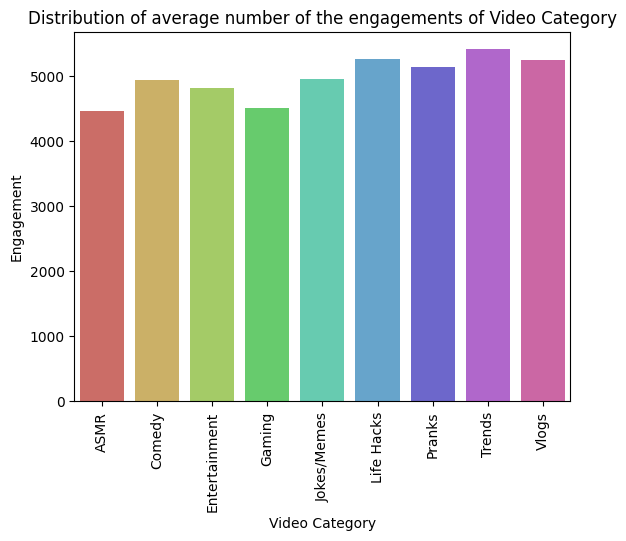

Frequency:
Distribution of people of Frequency
Frequency
Evening      36.5
Night        30.6
Afternoon    22.3
Morning      10.6
Name: count, dtype: float64


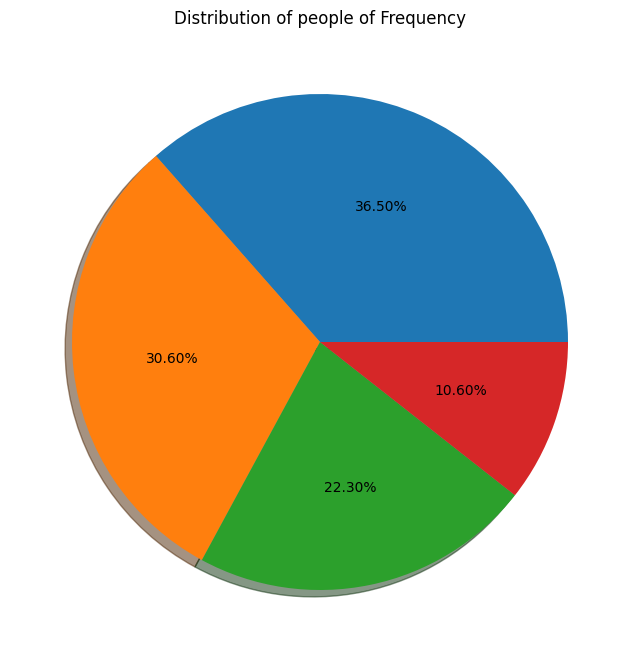

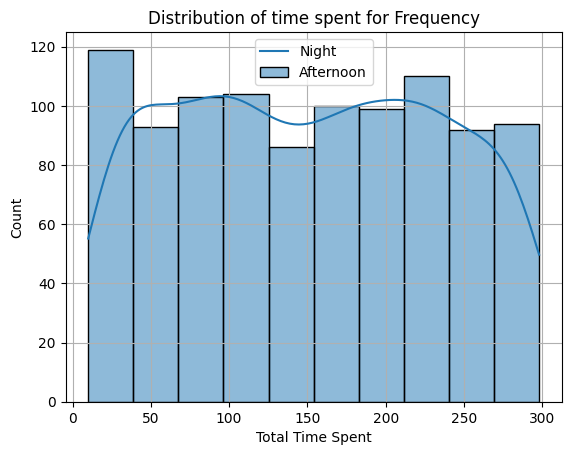

Total time spent by different groups of Frequency
Frequency
Afternoon    32400
Evening      56757
Morning      15646
Night        46603
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


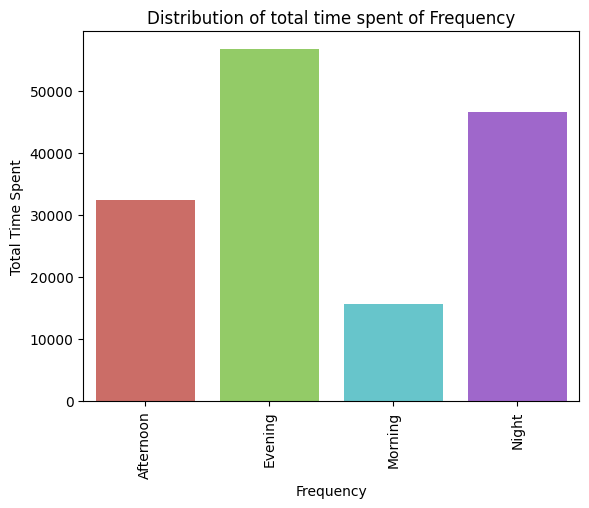

Average time spent by different groups of Frequency
Frequency
Afternoon    145.291480
Evening      155.498630
Morning      147.603774
Night        152.297386
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


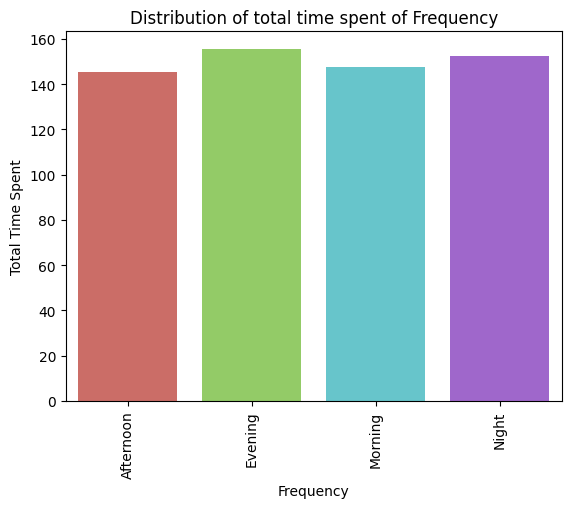

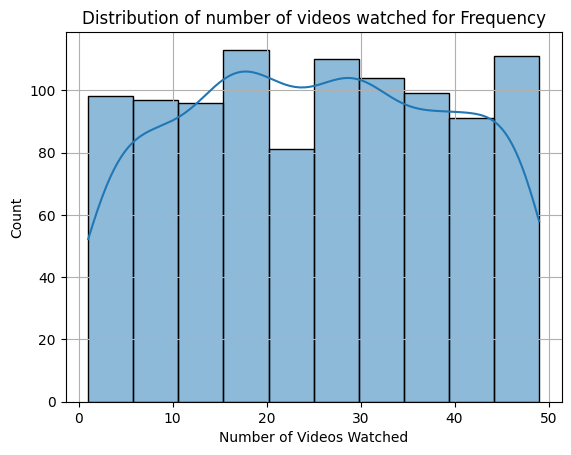

Total number of videos watched by different groups of Frequency
Frequency
Afternoon    5613
Evening      9048
Morning      2705
Night        7882
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


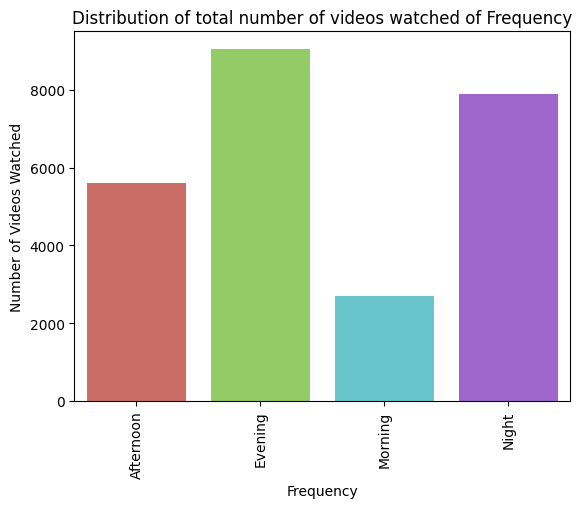

Average number of videos watched by different groups of Frequency
Frequency
Afternoon    25.170404
Evening      24.789041
Morning      25.518868
Night        25.758170
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


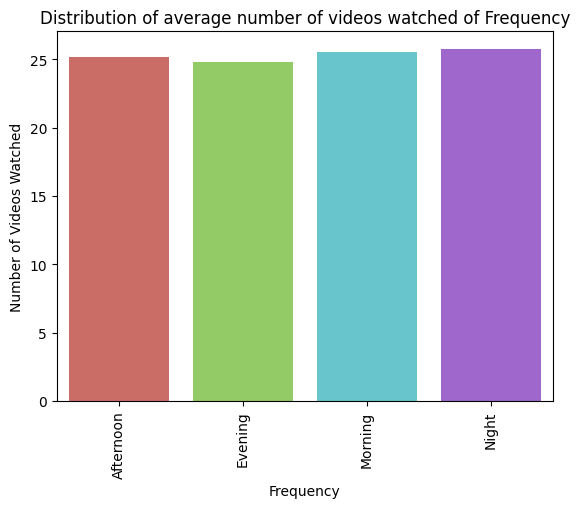

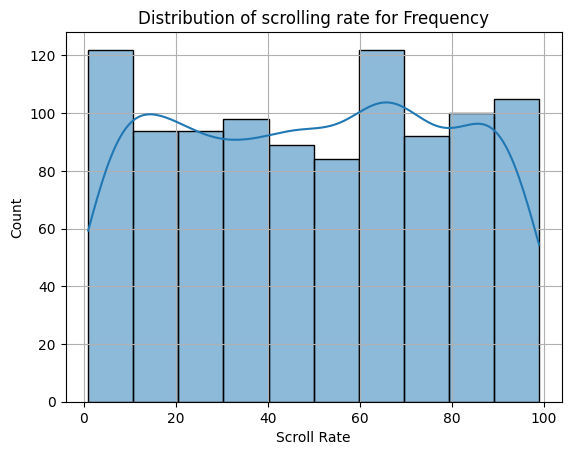

Total scrolling data by different groups of Frequency
Frequency
Afternoon    10796
Evening      17932
Morning       5462
Night        15584
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


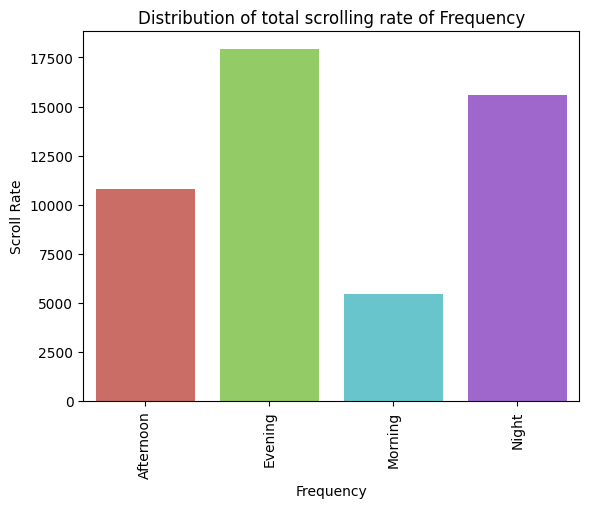

Average scrolling rate by different groups of Frequency
Frequency
Afternoon    48.412556
Evening      49.128767
Morning      51.528302
Night        50.928105
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


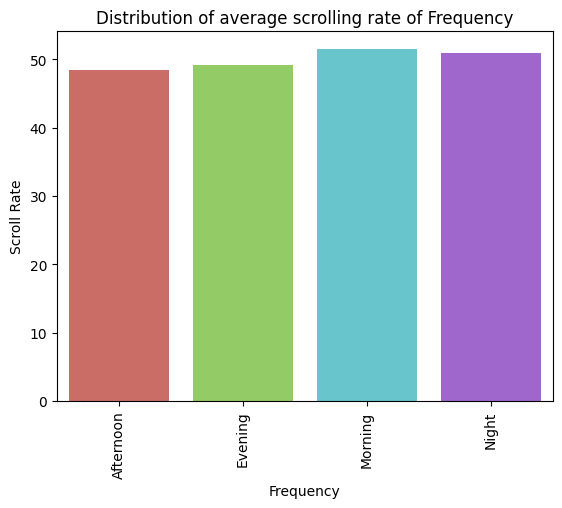

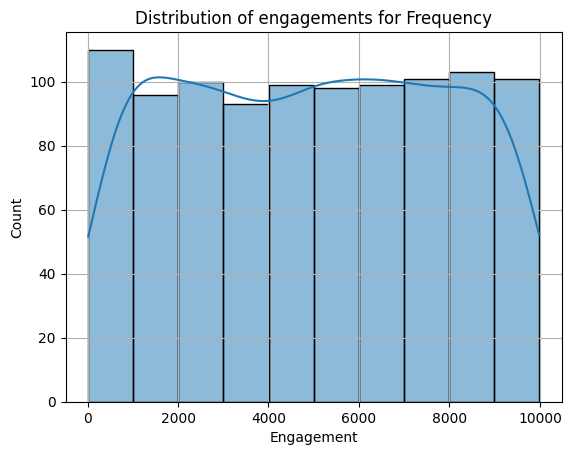

Total number of the engagements by different groups of Frequency
Frequency
Afternoon    1086830
Evening      1803965
Morning       511912
Night        1594452
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


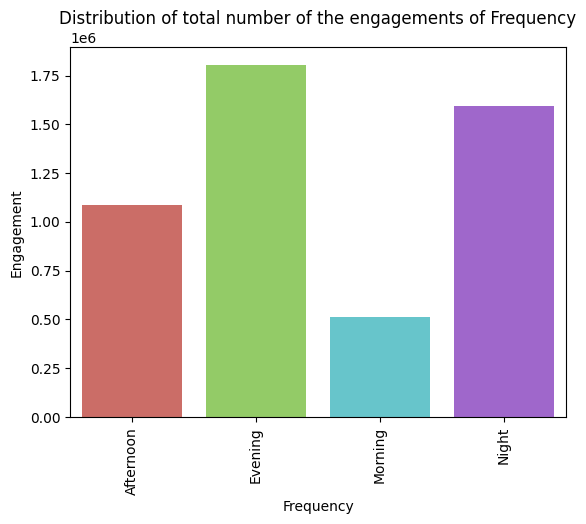

Average number of the engagements by different groups of Frequency
Frequency
Afternoon    4873.677130
Evening      4942.369863
Morning      4829.358491
Night        5210.627451
Name: Engagement, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


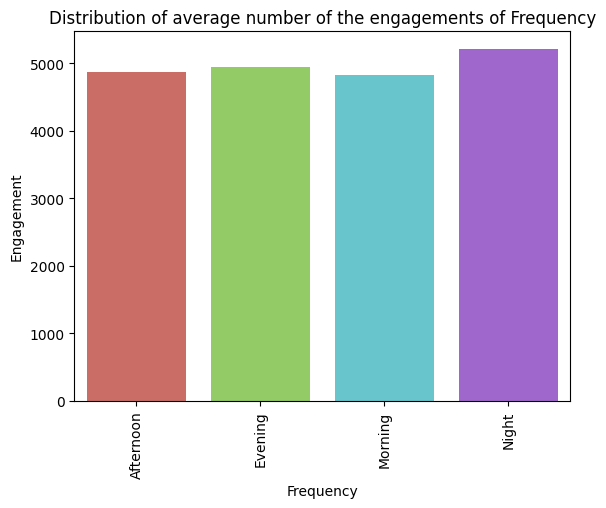

In [17]:
for i in obj_col[2:7]:
    ######################################################
    label.analyse_the_plot(modified_data,'Total Time Spent',i,'Engagement','Number of Videos Watched','Scroll Rate')

Frequency:
Distribution of people of Frequency
Frequency
Evening      36.5
Night        30.6
Afternoon    22.3
Morning      10.6
Name: count, dtype: float64


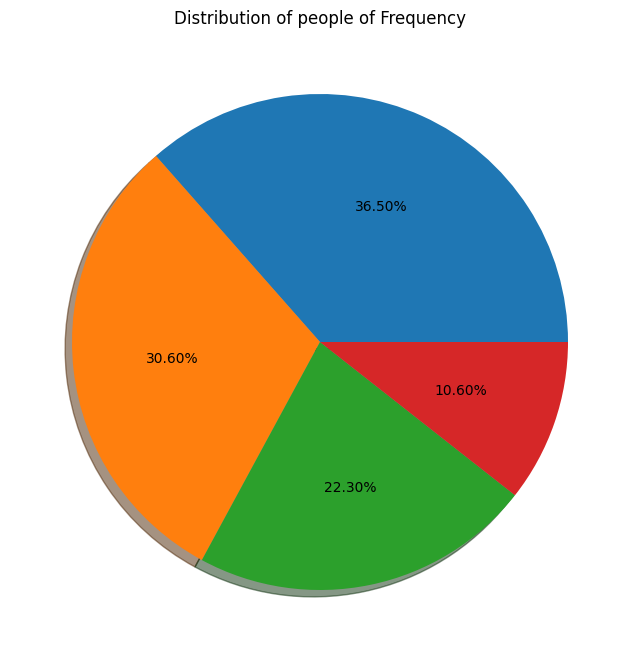

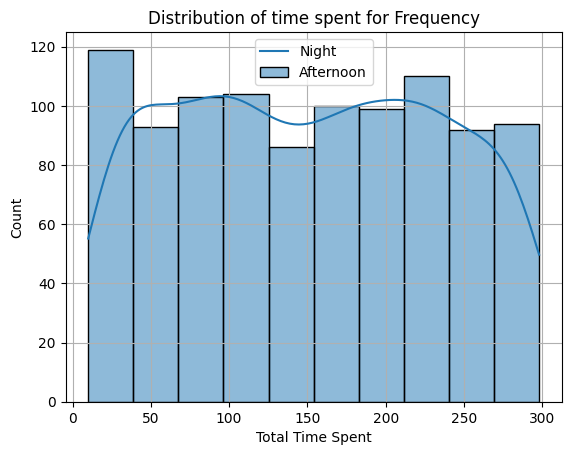

Total time spent by different groups of Frequency
Frequency
Afternoon    32400
Evening      56757
Morning      15646
Night        46603
Name: Total Time Spent, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].sum(),palette='hls')


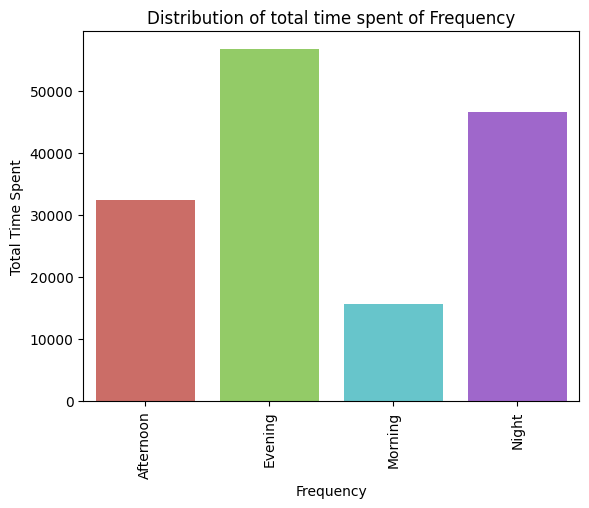

Average time spent by different groups of Frequency
Frequency
Afternoon    145.291480
Evening      155.498630
Morning      147.603774
Night        152.297386
Name: Total Time Spent, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.time_spent].mean(),palette='hls')


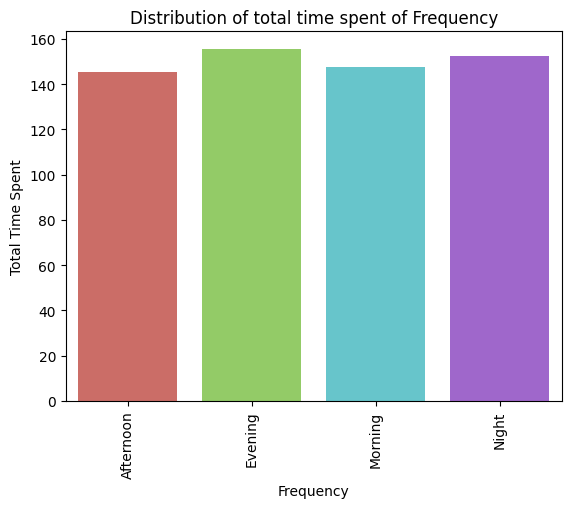

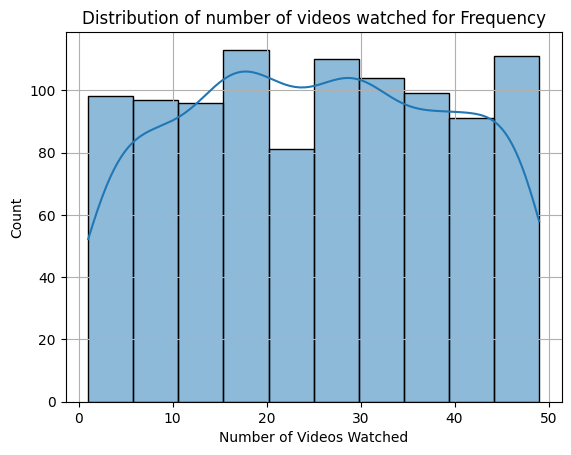

Total number of videos watched by different groups of Frequency
Frequency
Afternoon    5613
Evening      9048
Morning      2705
Night        7882
Name: Number of Videos Watched, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].sum(),palette='hls')


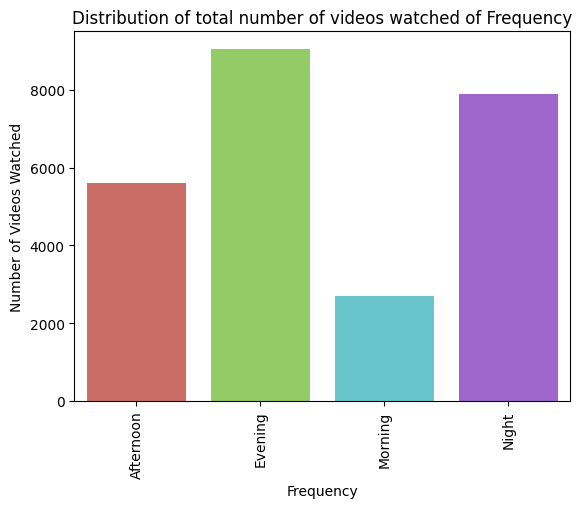

Average number of videos watched by different groups of Frequency
Frequency
Afternoon    25.170404
Evening      24.789041
Morning      25.518868
Night        25.758170
Name: Number of Videos Watched, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.no_of_videos_watched].mean(),palette='hls')


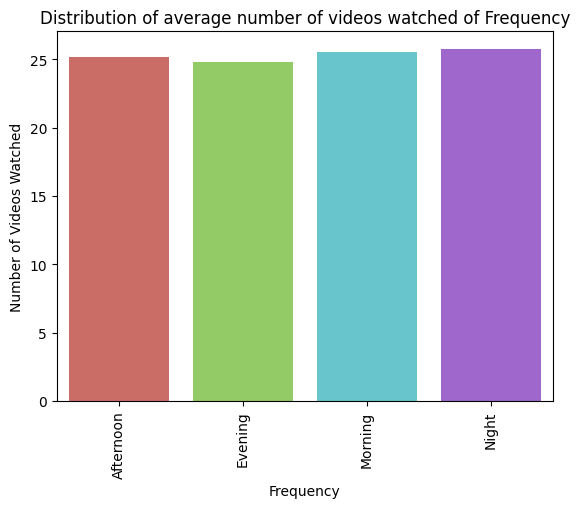

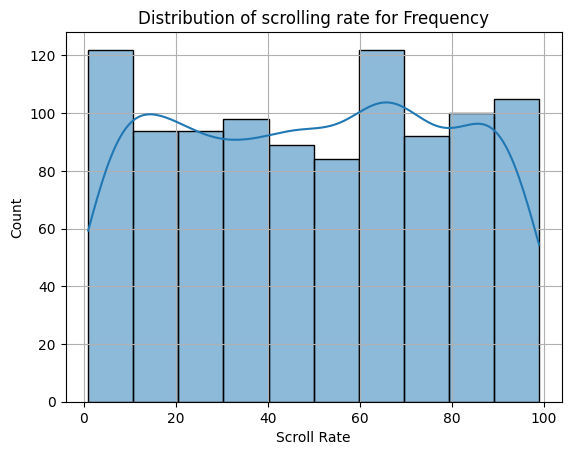

Total scrolling data by different groups of Frequency
Frequency
Afternoon    10796
Evening      17932
Morning       5462
Night        15584
Name: Scroll Rate, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].sum(),palette='hls')


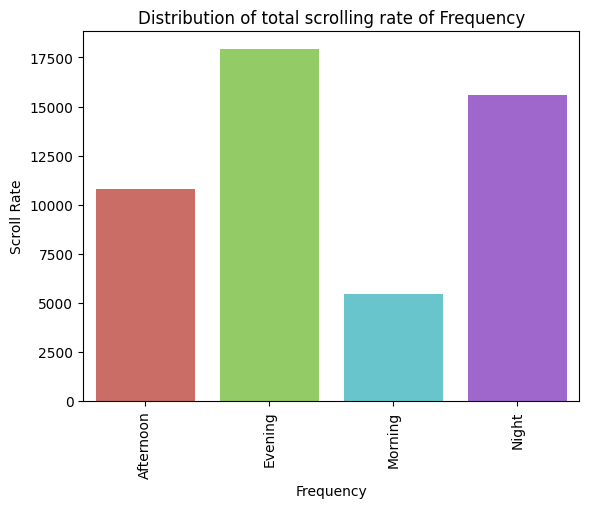

Average scrolling rate by different groups of Frequency
Frequency
Afternoon    48.412556
Evening      49.128767
Morning      51.528302
Night        50.928105
Name: Scroll Rate, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.scroll_rate].mean(),palette='hls')


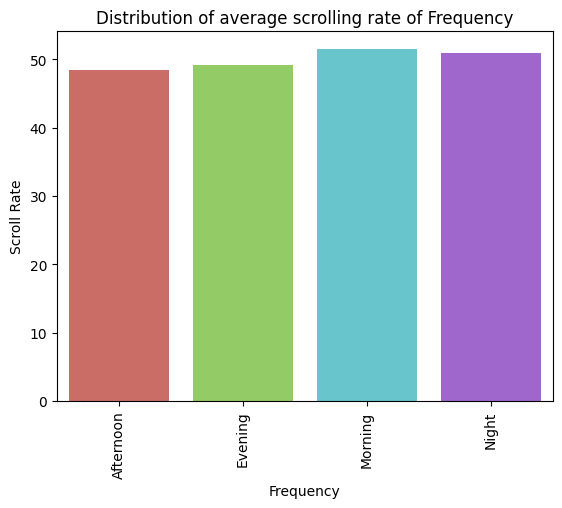

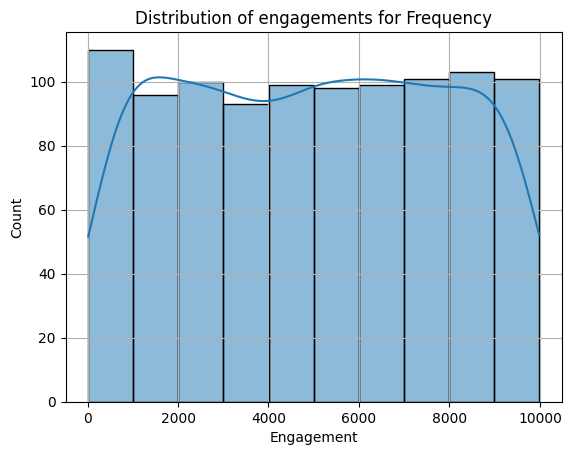

Total number of the engagements by different groups of Frequency
Frequency
Afternoon    1086830
Evening      1803965
Morning       511912
Night        1594452
Name: Engagement, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].sum(),palette='hls')


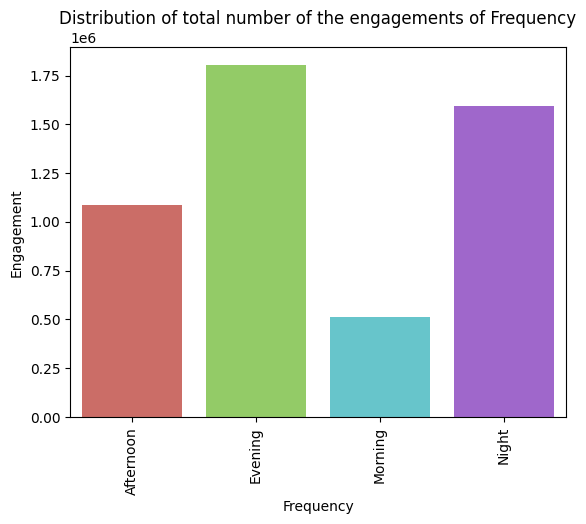

Average number of the engagements by different groups of Frequency
Frequency
Afternoon    4873.677130
Evening      4942.369863
Morning      4829.358491
Night        5210.627451
Name: Engagement, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13140\2464331328.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(self.df.groupby(self.category)[self.engaement].mean(),palette='hls')


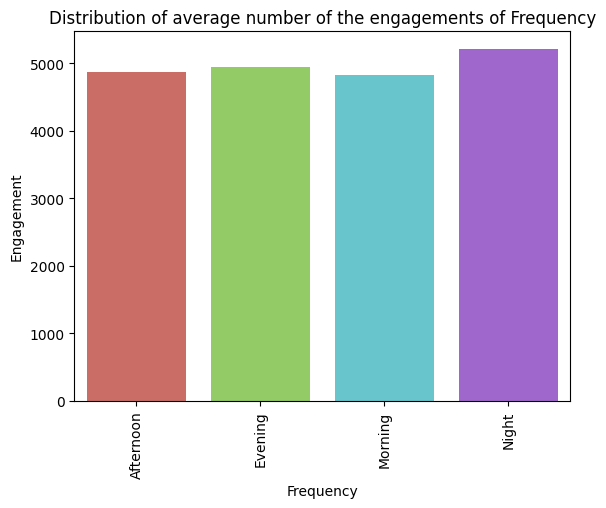

In [18]:
label.analyse_the_plot(modified_data,'Total Time Spent','Frequency','Engagement','Number of Videos Watched','Scroll Rate')

In [19]:
#list of all numeric data type of the modified dataframe
numeric_col=modified_data.select_dtypes(include=['int','float']).drop(columns=['UserID','Video ID'],axis=1).columns.to_list()
numeric_col

['Age',
 'Income',
 'Total Time Spent',
 'Number of Sessions',
 'Video Length',
 'Engagement',
 'Importance Score',
 'Time Spent On Video',
 'Number of Videos Watched',
 'Scroll Rate',
 'ProductivityLoss',
 'Satisfaction',
 'Self Control',
 'Addiction Level']

In [20]:
updated_data=modified_data.drop(columns=['UserID','Video ID'],axis=1)
updated_data.head()


Age  Gender       Location  Income   Debt  Owns Property     Profession  \
0   56    Male       Pakistan   82812   True           True       Engineer   
1   46  Female         Mexico   27999  False           True         Artist   
2   32  Female  United States   42436  False           True       Engineer   
3   60    Male         Barzil   62963   True          False  Waiting staff   
4   25    Male       Pakistan   22096  False           True        Manager   

  Demographics   Platform  Total Time Spent  ...  ProductivityLoss  \
0        Rural  Instagram                80  ...                 3   
1        Urban  Instagram               228  ...                 5   
2        Rural   Facebook                30  ...                 6   
3        Rural    YouTube               101  ...                 3   
4        Urban     TikTok               136  ...                 8   

  Satisfaction     Watch Reason  DeviceType       OS  Watch Time  \
0            7  Procrastination  Smartphone  Android     9:00 PM   
1            5            Habit    Computer  Android     5:00 PM   
2            4    Entertainment      Tablet  Android     2:00 PM   
3            7            Habit  Smartphone  Android     9:00 PM   
4            2          Boredom  Smartphone      iOS     8:00 AM   

   Self Control  Addiction Level CurrentActivity  ConnectionType  
0             5                5       Commuting     Mobile Data  
1             7                3       At school           Wi-Fi  
2             8                2         At home     Mobile Data  
3             5                5       Commuting     Mobile Data  
4            10                0         At home     Mobile Data  

[5 rows x 29 columns]

In [21]:
class stats():
    def __init__(self):
        pass
    
    def statistic_numeric(self,df,col):
        self.df=df
        self.col=col
        
        logging.info('detailed analysis of the numeric data-type')
        
        print(f'{self.col}:')
        
        q3=self.df[self.col].quantile(0.75)
        q1=self.df[self.col].quantile(0.25)
        iqr=q3-q1
        lower_bound=q1-iqr
        upper_bound=q3+iqr
        print(f'lower bound of the {self.col}:{lower_bound}')
        print(f'upper bound of the {self.col}:{upper_bound}')
        
        print(f'mean of {self.col}={self.df[self.col].mean()}')
        print(f'minimum of {self.col}={self.df[self.col].min()}')
        print(f'25 percentile of {self.col}={q1}')
        print(f'median of {self.col}={self.df[self.col].median()}')
        print(f'75 percentile of {self.col}={q3}')
        print(f'maximum of {self.col}={self.df[self.col].max()}')
        print(f'variance of {self.col}={self.df[self.col].var()}')
        print(f'standardisation of {self.col}={self.df[self.col].std()}')
        
        sns.kdeplot(self.df[self.col],fill=True)
        plt.title(f'Distribution of {self.col}')
        plt.show()
        
        sns.boxplot(self.df[self.col])
        plt.title(f'Detection of outliers of {self.col}')
        plt.show()
        

In [22]:
s=stats()

Age:
lower bound of the Age:6.0
upper bound of the Age:75.0
mean of Age=40.986
minimum of Age=18
25 percentile of Age=29.0
median of Age=42.0
75 percentile of Age=52.0
maximum of Age=64
variance of Age=182.191995995996
standardisation of Age=13.497851532595696


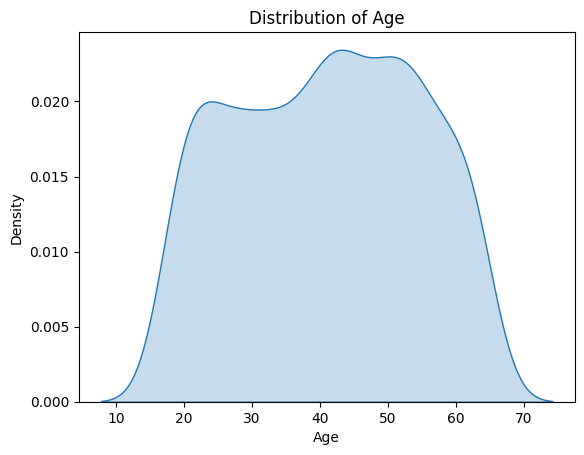

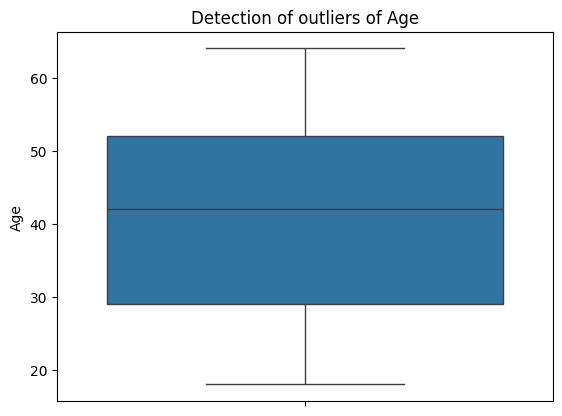

Income:
lower bound of the Income:-2441.75
upper bound of the Income:120909.25
mean of Income=59524.213
minimum of Income=20138
25 percentile of Income=38675.25
median of Income=58805.0
75 percentile of Income=79792.25
maximum of Income=99676
variance of Income=563407804.0276586
standardisation of Income=23736.212925141586


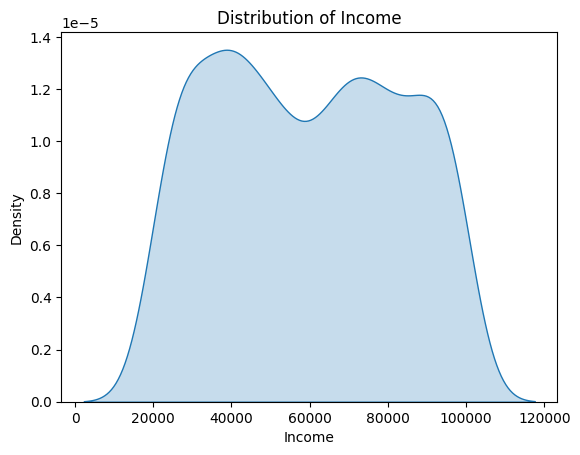

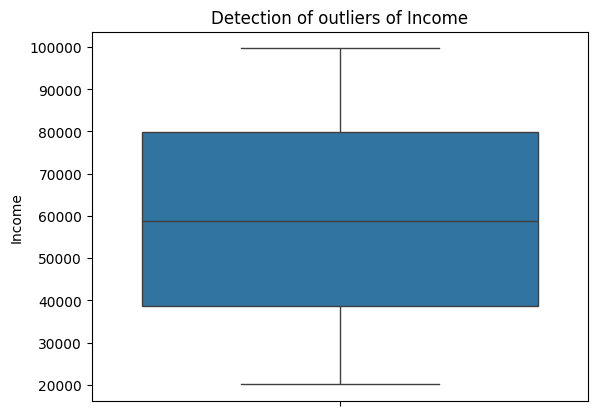

Total Time Spent:
lower bound of the Total Time Spent:-67.0
upper bound of the Total Time Spent:368.0
mean of Total Time Spent=151.406
minimum of Total Time Spent=10
25 percentile of Total Time Spent=78.0
median of Total Time Spent=152.0
75 percentile of Total Time Spent=223.0
maximum of Total Time Spent=298
variance of Total Time Spent=7048.045209209209
standardisation of Total Time Spent=83.95263670194765


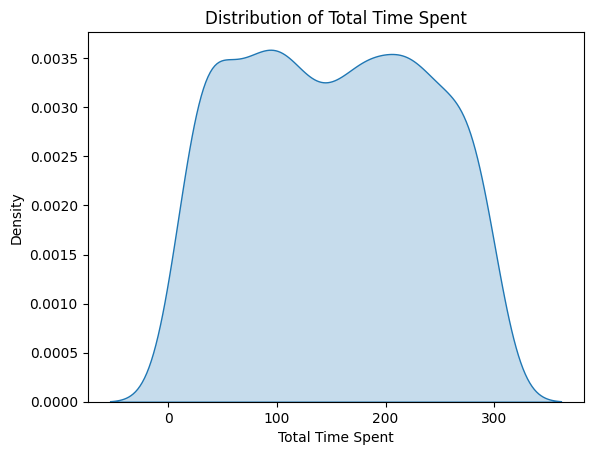

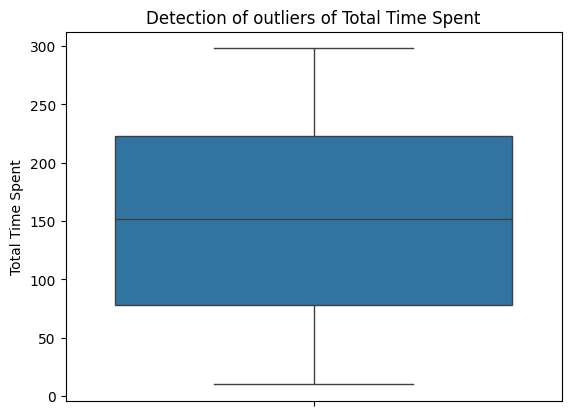

Number of Sessions:
lower bound of the Number of Sessions:-3.0
upper bound of the Number of Sessions:24.0
mean of Number of Sessions=10.013
minimum of Number of Sessions=1
25 percentile of Number of Sessions=6.0
median of Number of Sessions=10.0
75 percentile of Number of Sessions=15.0
maximum of Number of Sessions=19
variance of Number of Sessions=28.947778778778776
standardisation of Number of Sessions=5.380314003734241


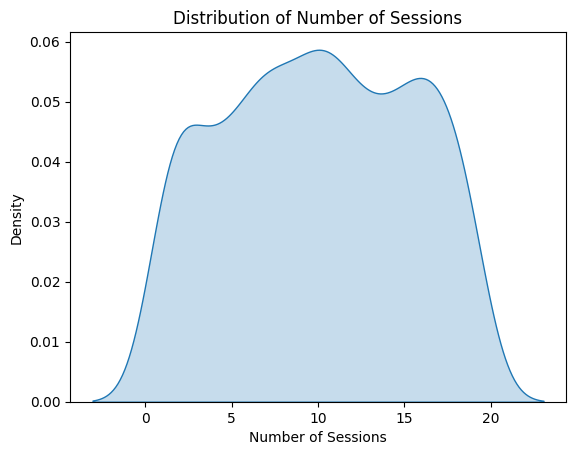

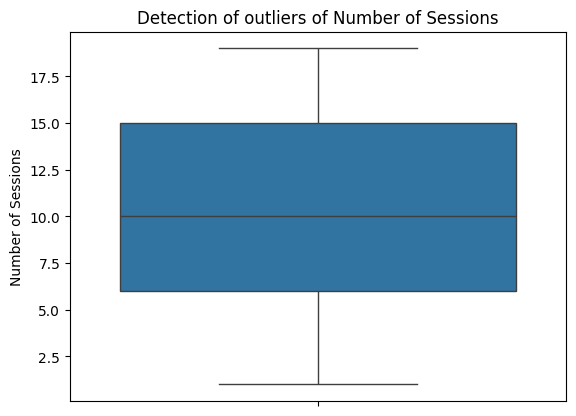

Video Length:
lower bound of the Video Length:-6.0
upper bound of the Video Length:36.0
mean of Video Length=15.214
minimum of Video Length=1
25 percentile of Video Length=8.0
median of Video Length=15.0
75 percentile of Video Length=22.0
maximum of Video Length=29
variance of Video Length=67.64985385385386
standardisation of Video Length=8.224953121681233


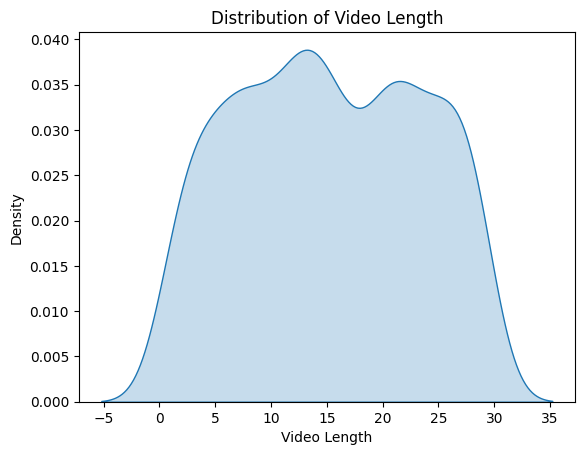

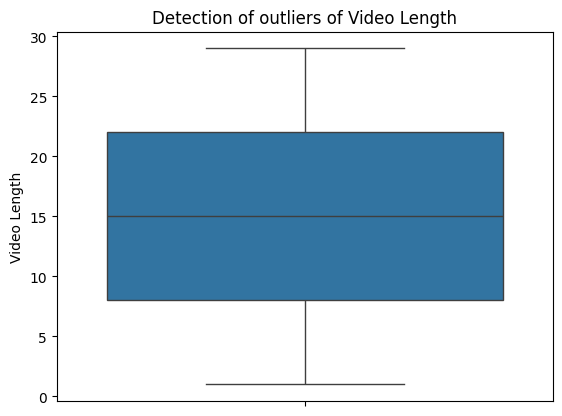

Engagement:
lower bound of the Engagement:-2708.75
upper bound of the Engagement:12664.75
mean of Engagement=4997.159
minimum of Engagement=15
25 percentile of Engagement=2415.75
median of Engagement=5016.0
75 percentile of Engagement=7540.25
maximum of Engagement=9982
variance of Engagement=8468412.540259259
standardisation of Engagement=2910.053700579984


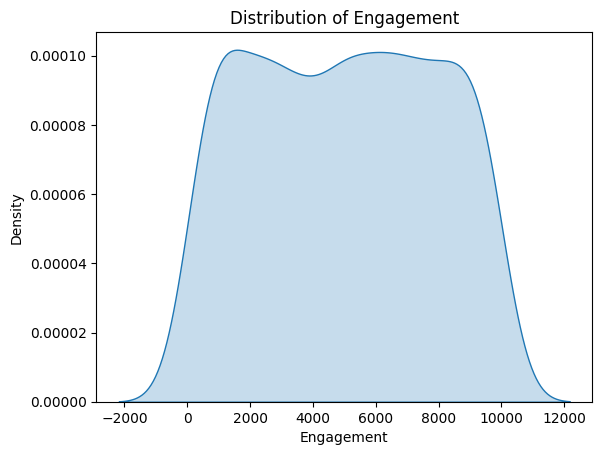

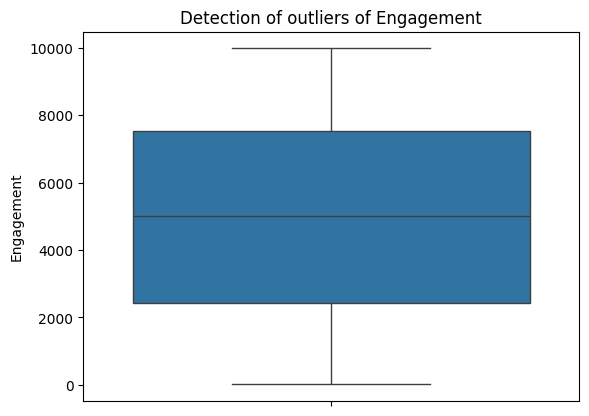

Importance Score:
lower bound of the Importance Score:-1.0
upper bound of the Importance Score:11.0
mean of Importance Score=5.129
minimum of Importance Score=1
25 percentile of Importance Score=3.0
median of Importance Score=5.0
75 percentile of Importance Score=7.0
maximum of Importance Score=9
variance of Importance Score=6.67103003003003
standardisation of Importance Score=2.5828337209410193


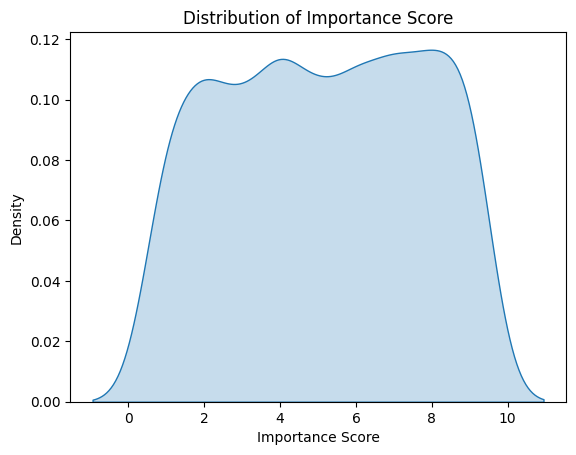

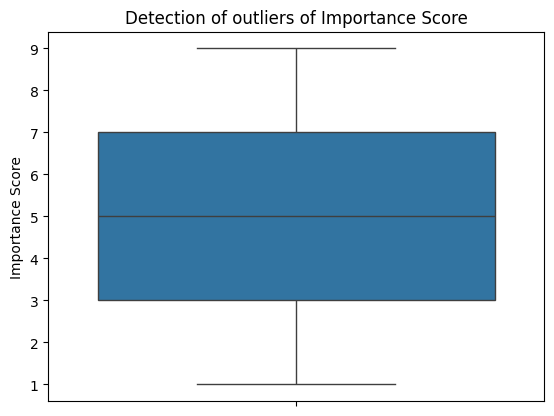

Time Spent On Video:
lower bound of the Time Spent On Video:-6.0
upper bound of the Time Spent On Video:36.0
mean of Time Spent On Video=14.973
minimum of Time Spent On Video=1
25 percentile of Time Spent On Video=8.0
median of Time Spent On Video=15.0
75 percentile of Time Spent On Video=22.0
maximum of Time Spent On Video=29
variance of Time Spent On Video=67.24151251251251
standardisation of Time Spent On Video=8.20009222585408


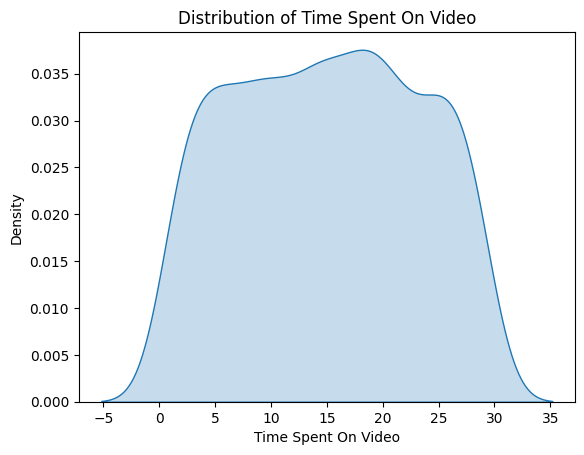

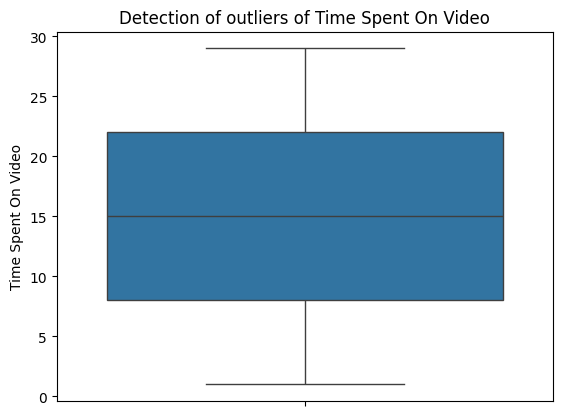

Number of Videos Watched:
lower bound of the Number of Videos Watched:-9.0
upper bound of the Number of Videos Watched:60.0
mean of Number of Videos Watched=25.248
minimum of Number of Videos Watched=1
25 percentile of Number of Videos Watched=14.0
median of Number of Videos Watched=25.0
75 percentile of Number of Videos Watched=37.0
maximum of Number of Videos Watched=49
variance of Number of Videos Watched=196.8173133133133
standardisation of Number of Videos Watched=14.029159394393995


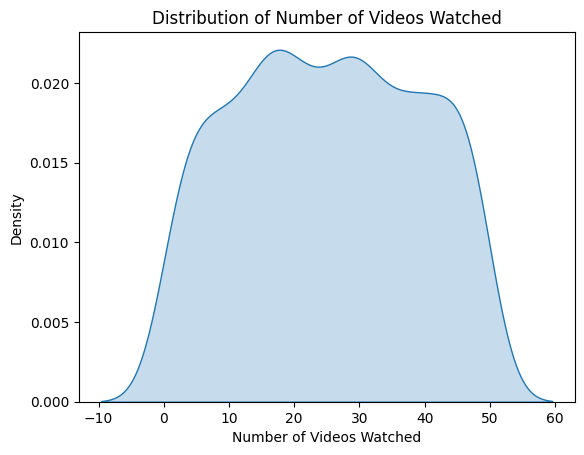

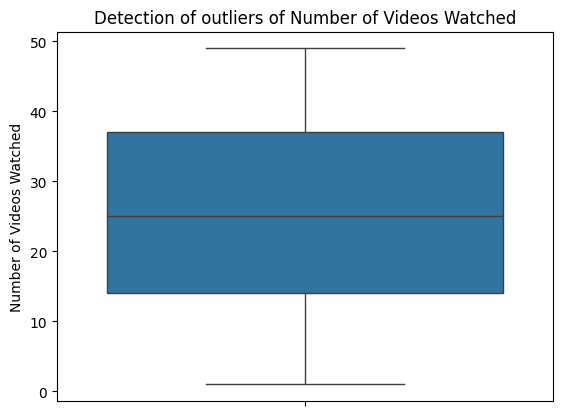

Scroll Rate:
lower bound of the Scroll Rate:-28.0
upper bound of the Scroll Rate:125.0
mean of Scroll Rate=49.774
minimum of Scroll Rate=1
25 percentile of Scroll Rate=23.0
median of Scroll Rate=50.0
75 percentile of Scroll Rate=74.0
maximum of Scroll Rate=99
variance of Scroll Rate=852.5114354354355
standardisation of Scroll Rate=29.197798468984534


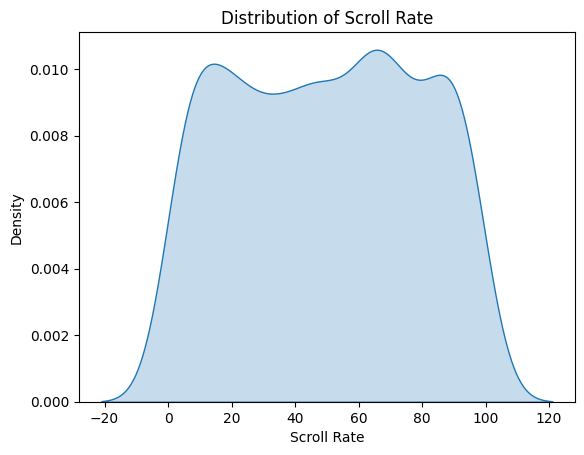

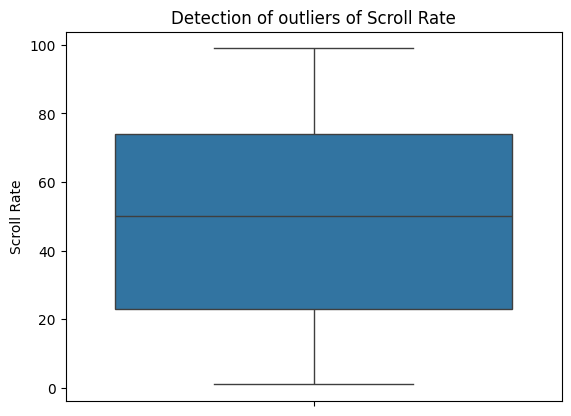

ProductivityLoss:
lower bound of the ProductivityLoss:0.0
upper bound of the ProductivityLoss:9.0
mean of ProductivityLoss=5.136
minimum of ProductivityLoss=1
25 percentile of ProductivityLoss=3.0
median of ProductivityLoss=5.0
75 percentile of ProductivityLoss=6.0
maximum of ProductivityLoss=9
variance of ProductivityLoss=4.504008008008008
standardisation of ProductivityLoss=2.122264829847587


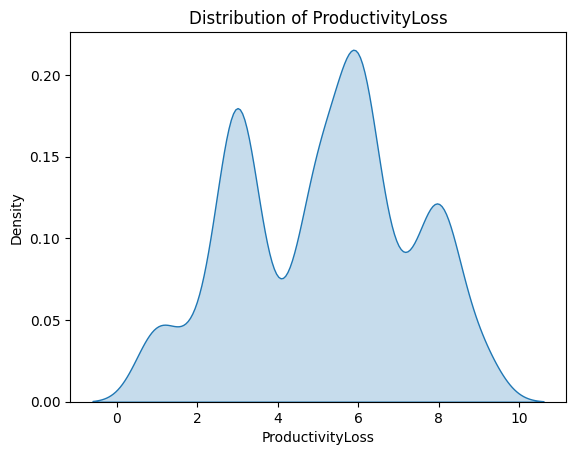

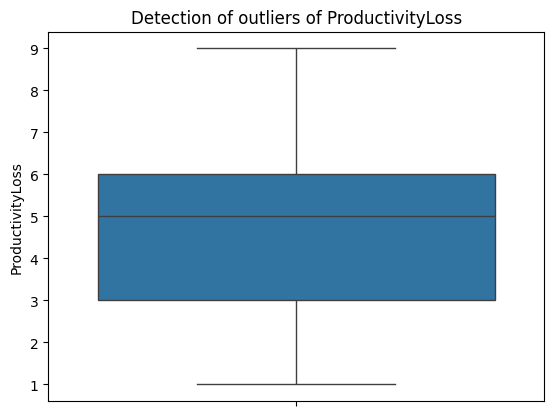

Satisfaction:
lower bound of the Satisfaction:1.0
upper bound of the Satisfaction:10.0
mean of Satisfaction=4.864
minimum of Satisfaction=1
25 percentile of Satisfaction=4.0
median of Satisfaction=5.0
75 percentile of Satisfaction=7.0
maximum of Satisfaction=9
variance of Satisfaction=4.504008008008008
standardisation of Satisfaction=2.122264829847587


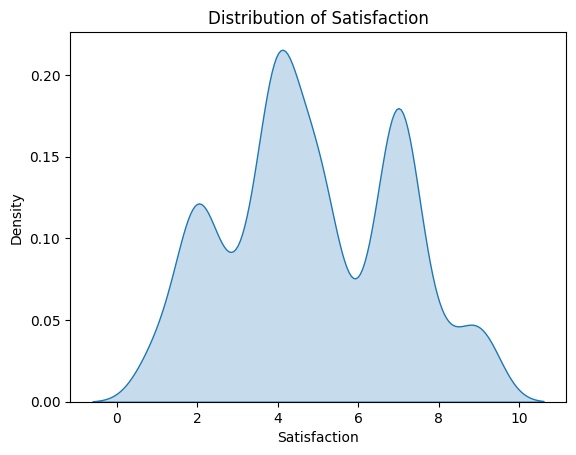

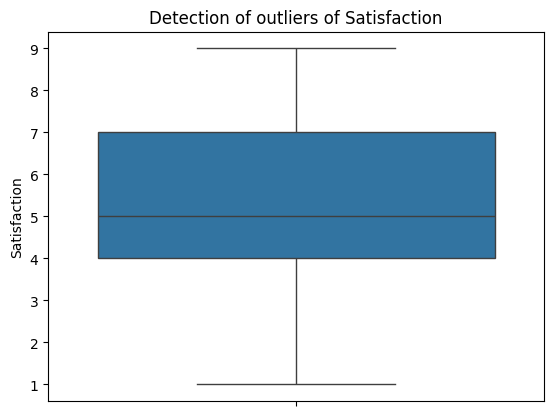

Self Control:
lower bound of the Self Control:2.0
upper bound of the Self Control:11.0
mean of Self Control=7.094
minimum of Self Control=3
25 percentile of Self Control=5.0
median of Self Control=7.0
75 percentile of Self Control=8.0
maximum of Self Control=10
variance of Self Control=4.2374014014014
standardisation of Self Control=2.058494935966907


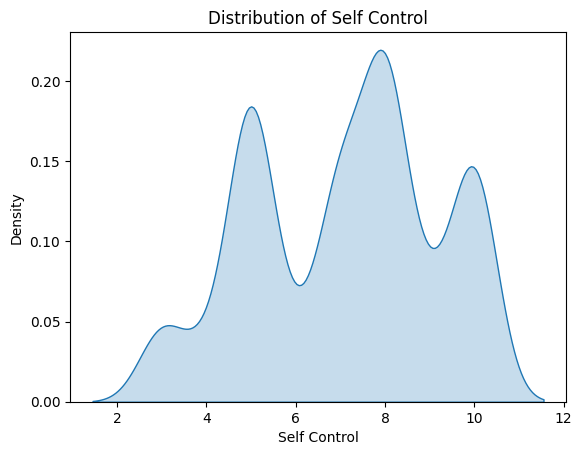

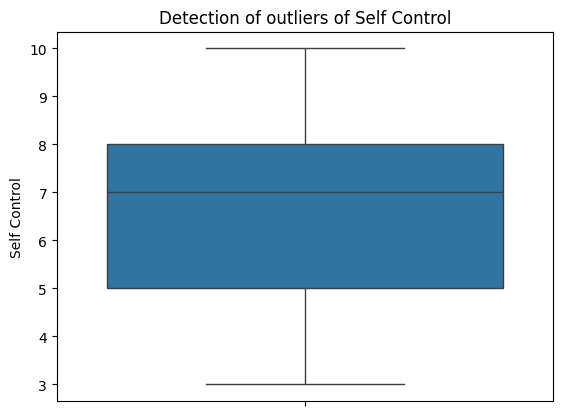

Addiction Level:
lower bound of the Addiction Level:-1.0
upper bound of the Addiction Level:8.0
mean of Addiction Level=2.906
minimum of Addiction Level=0
25 percentile of Addiction Level=2.0
median of Addiction Level=3.0
75 percentile of Addiction Level=5.0
maximum of Addiction Level=7
variance of Addiction Level=4.2374014014014
standardisation of Addiction Level=2.058494935966907


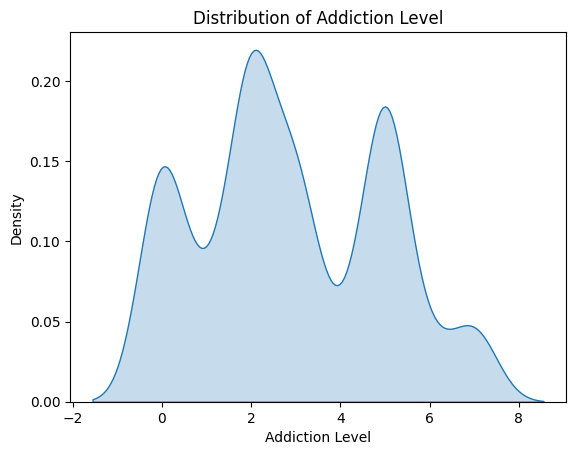

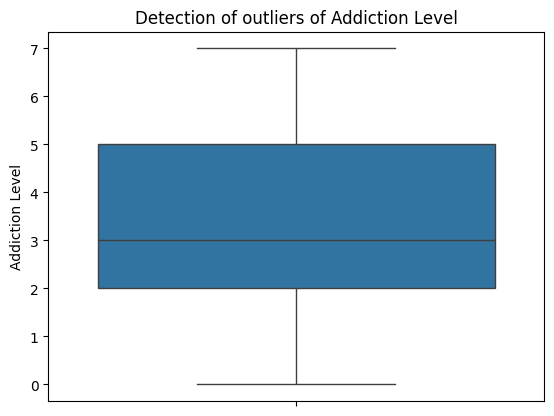

In [23]:
for i in numeric_col[:]:
        s.statistic_numeric(updated_data,i)

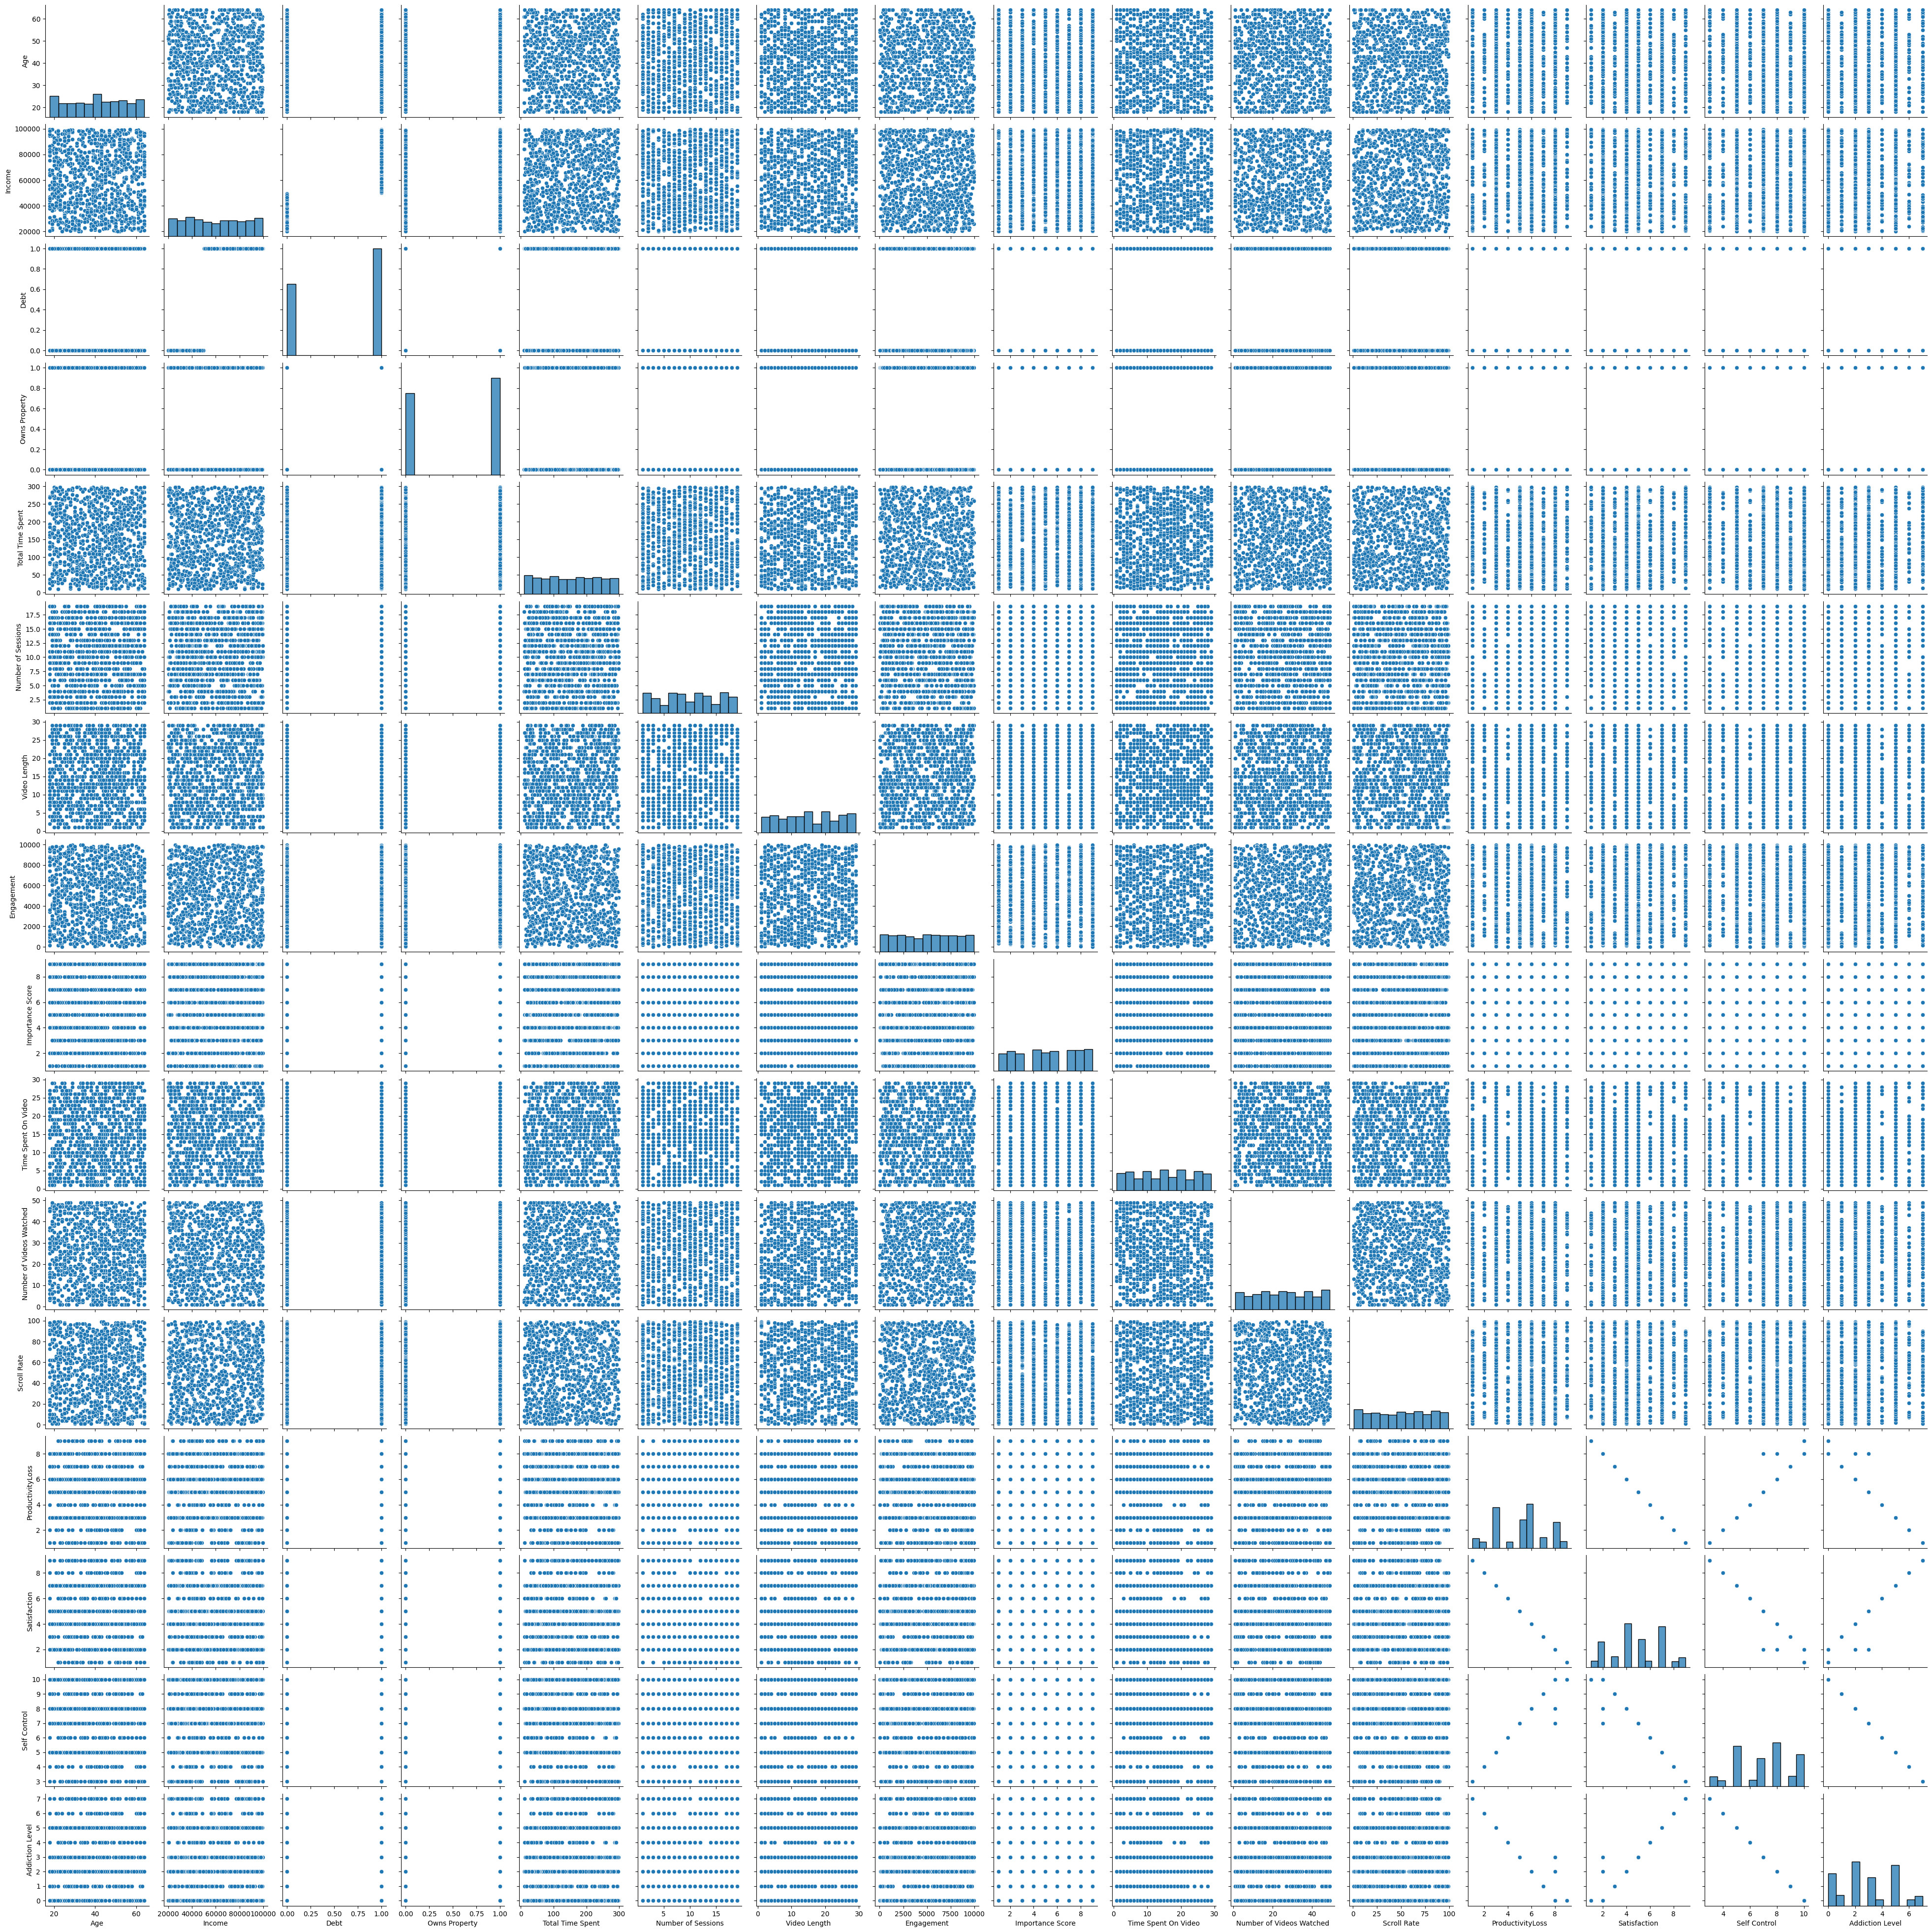

In [24]:
sns.pairplot(updated_data)
plt.show()